# Pruebas con las funciones principales del código

## Importación de librería

In [1]:
from polynomial_preprocessing import procesamiento_datos_continuos, procesamiento_datos_grillados, preprocesamiento_datos_a_grillar
from polynomial_preprocessing.optimization import optimizacion_parametros_continuos, optimizacion_parametros_grillados
from polynomial_preprocessing.image_synthesis import conjugate_gradient
import numpy as np
from scipy.interpolate import griddata
from astropy.io import fits
from matplotlib import pyplot as plt

## Ejemplo de uso de optimización de parametros:

In [ ]:
ejemplo_opti_dc = optimizacion_parametros_continuos.OptimizacionParametrosContinuos(
    "/home/stephan/polynomial_preprocessing/datasets/HD142/dirty_images_natural_251.fits",
    "/home/stephan/polynomial_preprocessing/datasets/HD142/hd142_b9cont_self_tav.ms",  
	[10, 24],
	[1e-3, 1e-1],
	0.0007310213536,
	251)

ejemplo_opti_dc.initialize_optimization(100)

## Ejemplo de uso del procesamiento de datos continuos con los parametros óptimos encontrados anteriormente:

8.144757559555597e-08 rad
1.163536794222228e-08 rad


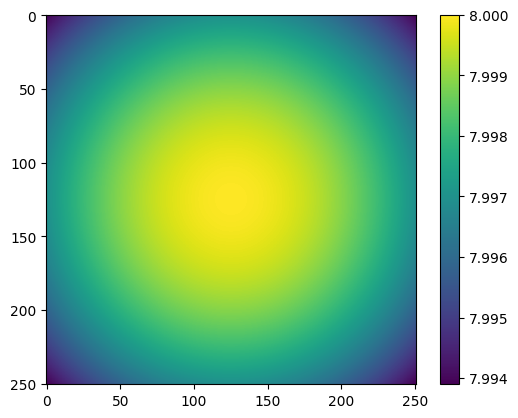

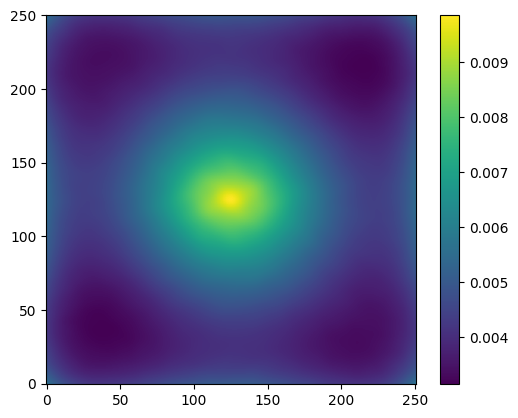

gridded_visibilities_2d:  (251, 251)
gridded_weights_2d:  (251, 251)
MAX FINAL: (1.3167353691572625e-05-1.9058241313221758e-21j)
MIN FINAL: (-5.097063329642803e-05+2.9990761691962767e-05j)


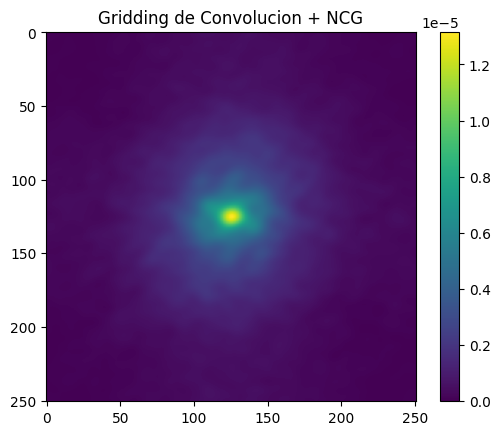

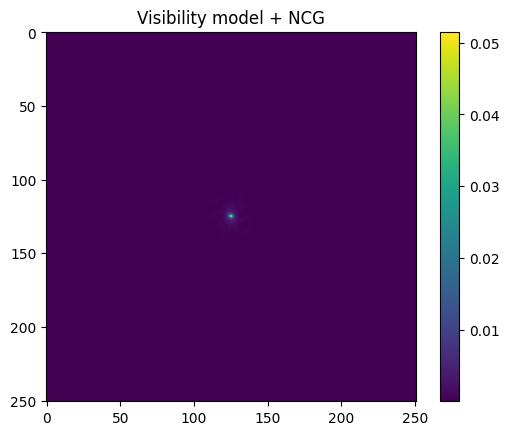

In [17]:
ejemplo_dg = preprocesamiento_datos_a_grillar.PreprocesamientoDatosAGrillar(
    "/disk2/stephan/TesisAlgoritmoParalelo/datasets/GWLup/GWLup_p0.01_n513.fits",
    "/disk2/stephan/TesisAlgoritmoParalelo/datasets/GWLup/GWLup_continuum.ms",
    251
)

visibilidades_grilladas, pesos_grillados, dx, u, v = ejemplo_dg.process_ms_file()

gridded_visibilities_2d = visibilidades_grilladas[0]  # (1,251,251)->(251,251)
gridded_weights_2d = pesos_grillados[0]  # (1,251,251)->(251,251)

print("gridded_visibilities_2d: ", visibilidades_grilladas[0].shape)
print("gridded_weights_2d: ", pesos_grillados[0].shape)


gc_image_1 = conjugate_gradient.ConjugateGradient(gridded_visibilities_2d, gridded_weights_2d/norm(gridded_weights_2d.flatten(), gridded_visibilities_2d.flatten()), 20)

gc_image_data = gc_image_1.CG()

visibility_model = np.fft.fftshift(np.fft.fft2(np.fft.ifftshift(gc_image_data)))

gc_image_model = np.fft.fftshift(np.fft.ifft2(np.fft.ifftshift(visibility_model)))


print("MAX FINAL:",np.max(gc_image_model))

print("MIN FINAL:",np.min(visibility_model))




title="Gridding de Convolucion + NCG"; fig=plt.figure(title); plt.title(title); im=plt.imshow(np.real(gc_image_model))
plt.colorbar(im)

title="Visibility model + NCG"; fig=plt.figure(title); plt.title(title); im=plt.imshow(np.absolute(visibility_model))
plt.colorbar(im)


plt.show()

8.144757559555597e-08 rad
1.163536794222228e-08 rad


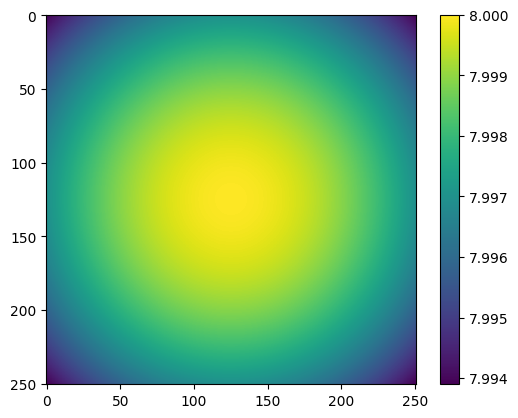

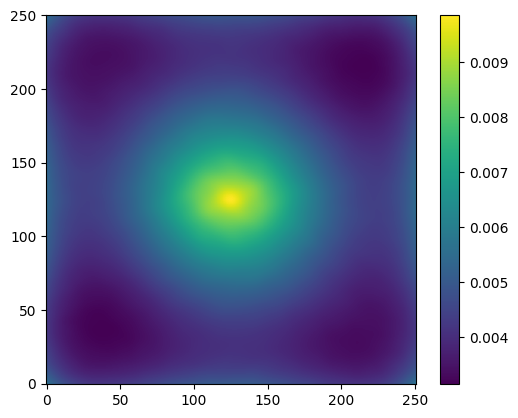

dx a entregar:  1.163536794222228e-08 rad
gw_sparse.shape:  (2421,)
u_sparse:  (2421,)
v_sparse:  (2421,)
z_sparse.shape:  (2421,)
16
Max. polynomial degree: 15
Division: 0.001
Sigma: 341139264000.0


/disk2/stephan/anaconda3/envs/pyralysis-env/lib/python3.12/site-packages/matplotlib/cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/disk2/stephan/anaconda3/envs/pyralysis-env/lib/python3.12/site-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


Tiempo de ejecución: 1.39 segundos


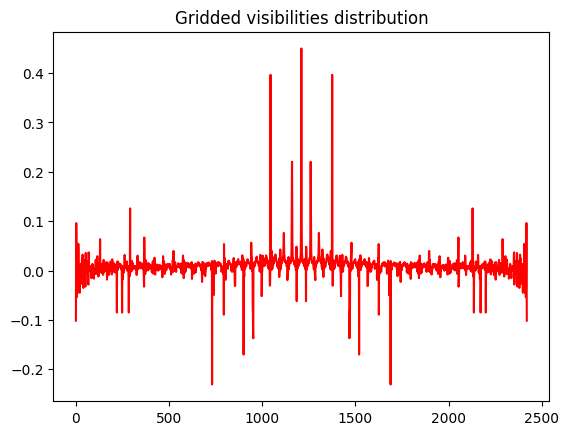

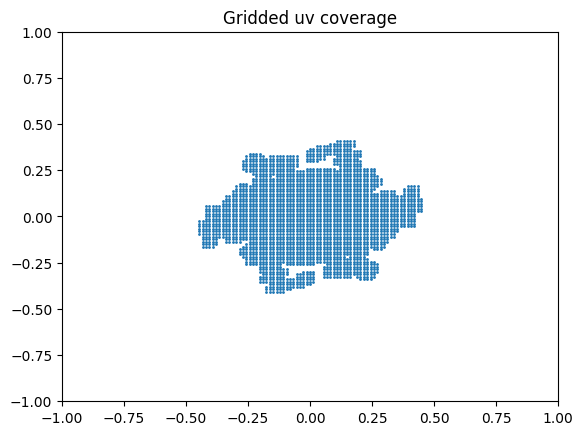

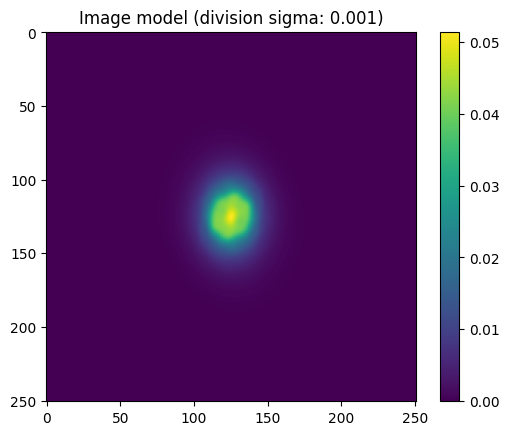

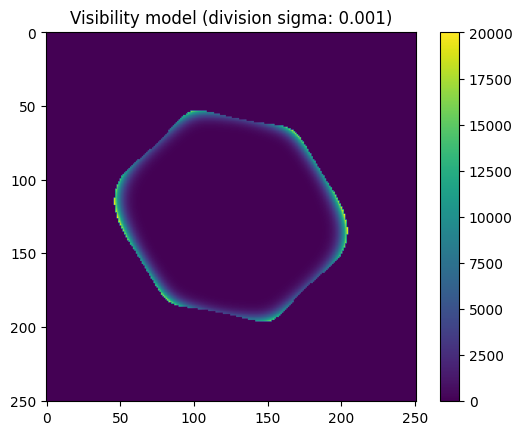

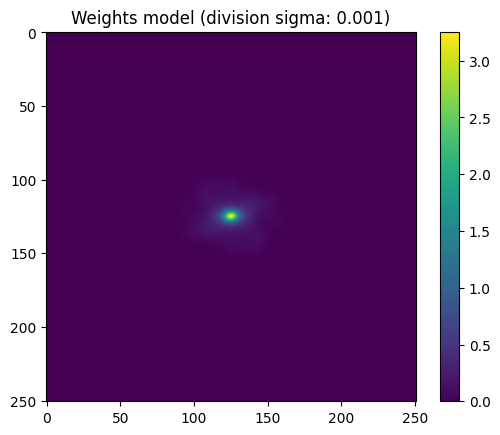

In [5]:
ejemplo1 = procesamiento_datos_grillados.ProcesamientoDatosGrillados(
	"/disk2/stephan/TesisAlgoritmoParalelo/datasets/GWLup/GWLup_p0.01_n513.fits",
    "/disk2/stephan/TesisAlgoritmoParalelo/datasets/GWLup/GWLup_continuum.ms", 
	15, 
    0.001,
    1.977778e-08,
    251,
    verbose = False
)

dirty_image, vis, weights, _, _ = ejemplo1.data_processing()

MAX FINAL: (0.0009095287614727732+9.56623045752017e-12j)
MIN FINAL: (-0.05340280786380374+0.0016695575356615838j)


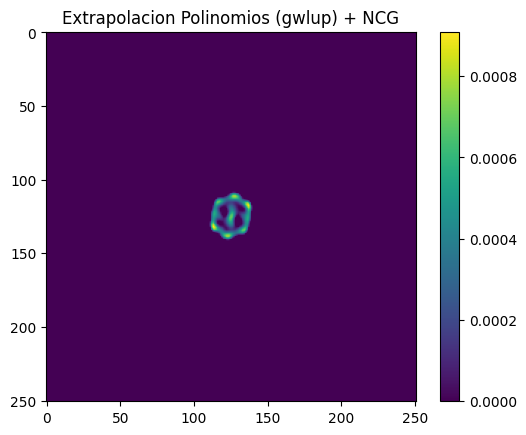

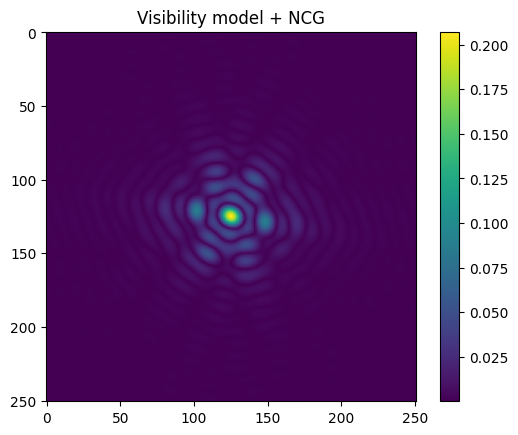

In [6]:
def norm(weights,x):
    return(np.absolute(np.sqrt(np.sum(weights*np.absolute(x)**2))))

gc_image_2 = conjugate_gradient.ConjugateGradient(vis, weights/norm(weights.flatten(), vis.flatten()), 100)

gc_image_data = gc_image_2.CG()

visibility_model = np.fft.fftshift(np.fft.fft2(np.fft.ifftshift(gc_image_data)))

gc_image_model = np.fft.fftshift(np.fft.ifft2(np.fft.ifftshift(visibility_model)))


print("MAX FINAL:",np.max(gc_image_model))

print("MIN FINAL:",np.min(visibility_model))


title="Extrapolacion Polinomios (gwlup) + NCG"; fig=plt.figure(title); plt.title(title); im=plt.imshow(np.real(gc_image_model))
plt.colorbar(im)

title="Visibility model + NCG"; fig=plt.figure(title); plt.title(title); im=plt.imshow(np.absolute(visibility_model))
plt.colorbar(im)


plt.show()

visbilidades dim. MS:  (253414, 8, 2)
visibilidades gridd. MS:  (253414,)
u_target:  (251, 251)
v_target:  (251, 251)
Max. polynomial degree: 15
Division: 0.0001
Sigma: 21343032.2265625
Polinomios inicializados.
Polinomios normalizados.
Hice G-S.
Tiempo de ejecución: 388.62 segundos


/disk2/stephan/anaconda3/envs/pyralysis-env/lib/python3.12/site-packages/matplotlib/cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/disk2/stephan/anaconda3/envs/pyralysis-env/lib/python3.12/site-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


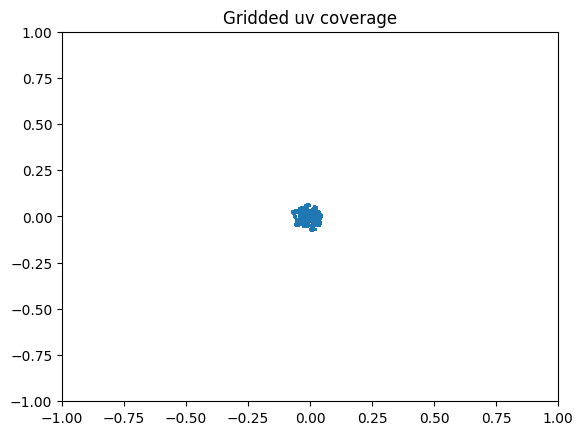

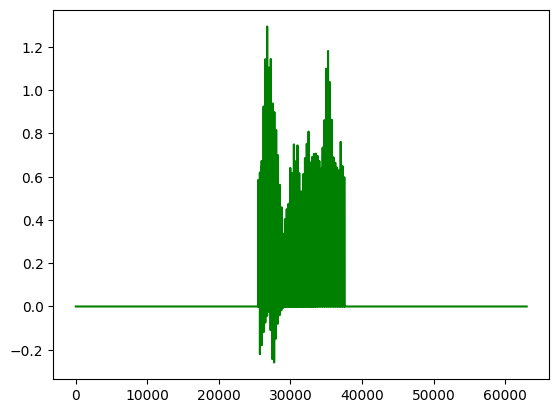

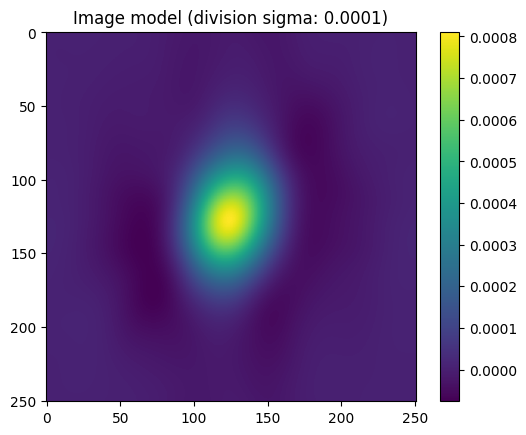

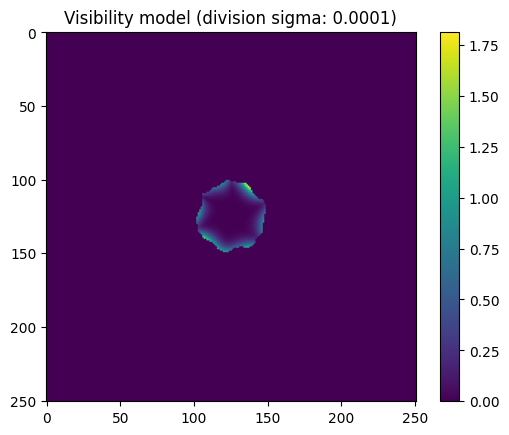

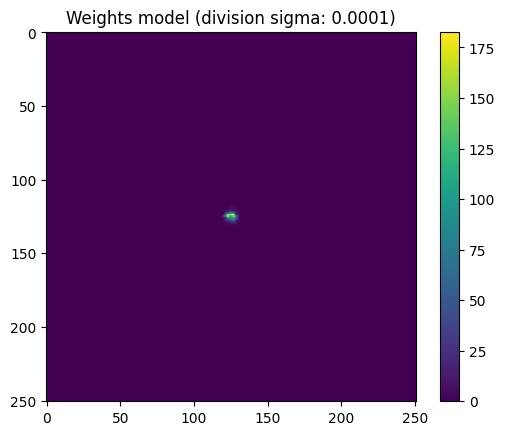

In [10]:
ejemplo1_dc = procesamiento_datos_continuos.ProcesamientoDatosContinuos(
	"/disk2/stephan/TesisAlgoritmoParalelo/datasets/GWLup/GWLup_p0.01_n513.fits",
    "/disk2/stephan/TesisAlgoritmoParalelo/datasets/GWLup/GWLup_continuum.ms", 
	15, 
    10**(-5),
    2.977778e-06,
    251,
    verbose = False
)

dirty_image, vis, weights, _, _ = ejemplo1_dc.data_processing()

MAX FINAL: (1.0239460368865087e-06+6.972703094238504e-09j)
MIN FINAL: (-6.138555936001012e-05+0.00026834967022972006j)


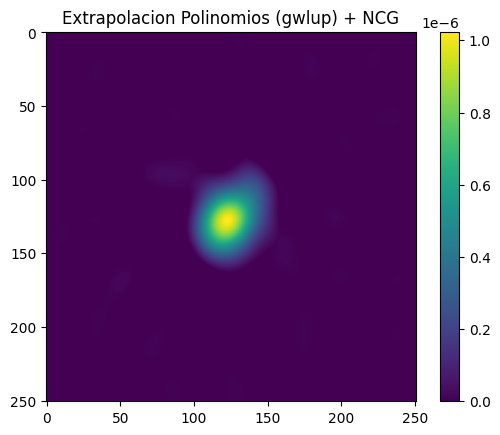

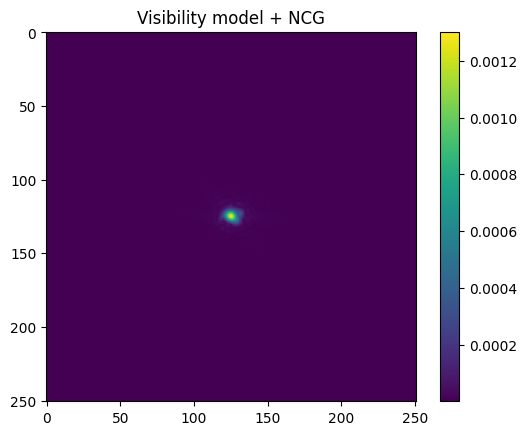

In [14]:
def norm(weights,x):
    return(np.absolute(np.sqrt(np.sum(weights*np.absolute(x)**2))))

gc_image_2 = conjugate_gradient.ConjugateGradient(vis, weights/norm(weights.flatten(), vis.flatten()), 10)

gc_image_data = gc_image_2.CG()

visibility_model = np.fft.fftshift(np.fft.fft2(np.fft.ifftshift(gc_image_data)))

gc_image_model = np.fft.fftshift(np.fft.ifft2(np.fft.ifftshift(visibility_model)))


print("MAX FINAL:",np.max(gc_image_model))

print("MIN FINAL:",np.min(visibility_model))


title="Extrapolacion Polinomios (gwlup) + NCG"; fig=plt.figure(title); plt.title(title); im=plt.imshow(np.real(gc_image_model))
plt.colorbar(im)

title="Visibility model + NCG"; fig=plt.figure(title); plt.title(title); im=plt.imshow(np.absolute(visibility_model))
plt.colorbar(im)


plt.show()

visbilidades dim. MS:  (15125, 1, 2)
visibilidades gridd. MS:  (15125,)
u_target:  (251, 251)
v_target:  (251, 251)
New S: 13
Division: 0.09783163540608564
Sigma: 7143.233010259968
El tiempo de ejecución fue de:  1.9335408210754395


/home/stephan/anaconda3/envs/pyralysis-env/lib/python3.12/site-packages/matplotlib/cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/home/stephan/anaconda3/envs/pyralysis-env/lib/python3.12/site-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


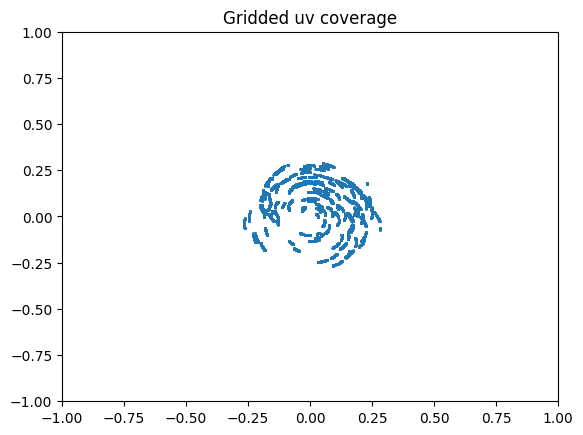

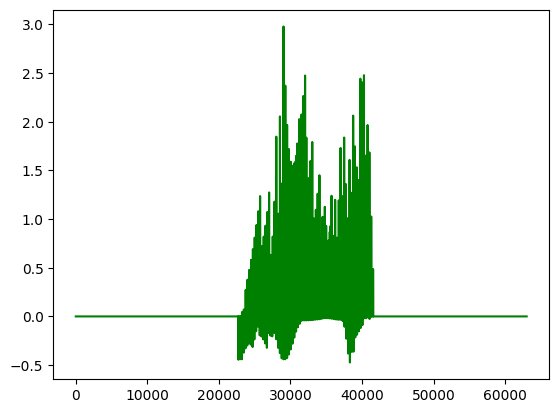

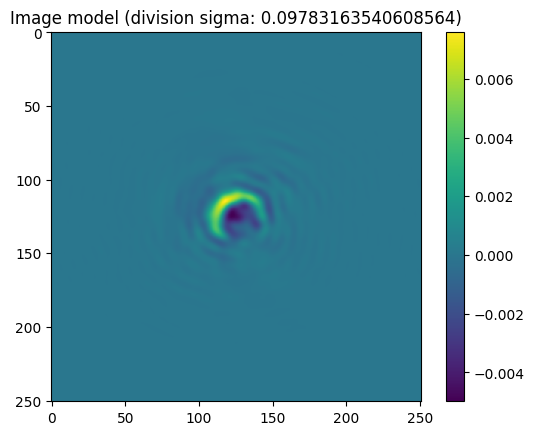

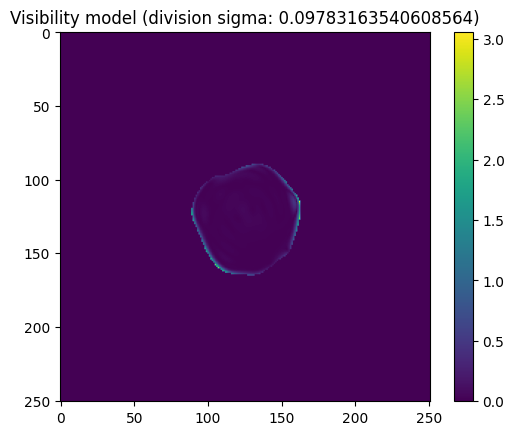

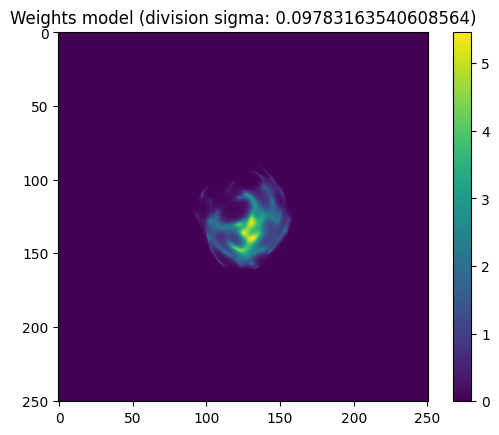

In [17]:
ejemplo_dc = procesamiento_datos_continuos.ProcesamientoDatosContinuos(
    "/home/stephan/polynomial_preprocessing/datasets/HD142/dirty_images_natural_251.fits",
    "/home/stephan/polynomial_preprocessing/datasets/HD142/hd142_b9cont_self_tav.ms", 
    13, 
    0.09783163540608564, 
    0.0007310213536, 
    251)

dirty_image_dc, pesos_dc, visibilidades_dc, u_data_dc, v_data_dc = ejemplo_dc.data_processing()

In [15]:
print("visibilities: ", visibilidades_dc.shape)

print("dirty image: ",dirty_image_dc.shape)

print("weights: ", pesos_dc.shape)

print("u coords: ", u_data_dc.shape)

print("v coords: ", v_data_dc.shape)
      

visibilities:  (251, 251)
dirty image:  (251, 251)
weights:  (251, 251)
u coords:  (15125,)
v coords:  (15125,)


In [4]:
print(pesos_dc)

[[2.84146380e-24 3.11237481e-24 3.40863488e-24 ... 8.86312470e-24
  7.96062475e-24 7.15158905e-24]
 [3.14487681e-24 3.44768363e-24 3.77912347e-24 ... 9.69367521e-24
  8.70082476e-24 7.81143528e-24]
 [3.48063962e-24 3.81910759e-24 4.18992100e-24 ... 1.06030576e-23
  9.51071829e-24 8.53291308e-24]
 ...
 [7.97608292e-24 8.91969331e-24 9.97769674e-24 ... 7.83263375e-24
  7.08675826e-24 6.41175231e-24]
 [7.33015556e-24 8.19183706e-24 9.15727323e-24 ... 7.07986538e-24
  6.41137010e-24 5.80582761e-24]
 [6.73660953e-24 7.52348197e-24 8.40445972e-24 ... 6.39919748e-24
  5.80006312e-24 5.25685037e-24]]


In [5]:
print(u_data_dc)

[  46.69929199   46.69928773  119.07919522 ...  -14.62868347 -112.27899533
  139.15162343]


In [6]:
print(v_data_dc)

[-160.47567874 -160.47567874  -30.99829882 ...   63.89080259   83.9271034
   26.81879913]


In [3]:
import numpy as np

def fletcher_reeves_conjugate_gradient(
    initial_image, visibilities, weights, u, v, max_iter=100, ftol=1e-6, gtol=1e-6, eps=1e-8, verbose=True
):
    """
    Algoritmo de gradiente conjugado no lineal utilizando el método de Fletcher-Reeves.

    Parámetros:
    -----------
    initial_image : numpy.ndarray
        Imagen inicial (2D array).
    visibilities : numpy.ndarray
        Visibilidades extrapoladas (1D array complejo).
    weights : numpy.ndarray
        Pesos de las visibilidades (1D array).
    u : numpy.ndarray
        Coordenadas u (parte real del plano uv).
    v : numpy.ndarray
        Coordenadas v (parte imaginaria del plano uv).
    max_iter : int, opcional
        Número máximo de iteraciones (por defecto 100).
    ftol : float, opcional
        Tolerancia para la diferencia en la función objetivo (por defecto 1e-6).
    gtol : float, opcional
        Tolerancia para la norma del gradiente (por defecto 1e-6).
    eps : float, opcional
        Valor pequeño para evitar divisiones por cero (por defecto 1e-8).
    verbose : bool, opcional
        Si es True, imprime información de progreso (por defecto True).

    Retorna:
    --------
    numpy.ndarray
        Imagen reconstruida.
    """
    # Inicializar la imagen
    x = initial_image.copy()

    # Calcular la función objetivo y el gradiente inicial
    f_prev = objective_function(x, visibilities, weights, u, v)
    g_prev = compute_gradient(x, visibilities, weights, u, v)

    # Inicializar la dirección de búsqueda
    d_prev = -g_prev

    for it in range(max_iter):
        if verbose:
            print(f"Iteración {it + 1}")

        # Búsqueda de línea para encontrar el tamaño de paso óptimo (alpha)
        alpha = line_search(x, d_prev, visibilities, weights, u, v)

        # Actualizar la imagen
        x = x + alpha * d_prev

        # Calcular la función objetivo y el gradiente en la nueva posición
        f_it = objective_function(x, visibilities, weights, u, v)
        g_it = compute_gradient(x, visibilities, weights, u, v)

        # Verificar criterio de parada basado en la función objetivo
        if 2.0 * abs(f_it - f_prev) <= ftol * (abs(f_it) + abs(f_prev) + eps):
            if verbose:
                print("Criterio de parada alcanzado: cambio en la función objetivo es pequeño.")
            break

        # Verificar criterio de parada basado en la norma del gradiente
        if np.linalg.norm(g_it) < gtol:
            if verbose:
                print("Criterio de parada alcanzado: norma del gradiente es pequeña.")
            break

        # Calcular el parámetro de Fletcher-Reeves (beta)
        beta = np.sum(g_it**2) / np.sum(g_prev**2)

        # Actualizar la dirección de búsqueda
        d_prev = -g_it + beta * d_prev

        # Actualizar valores para la siguiente iteración
        f_prev, g_prev = f_it, g_it

        if verbose:
            print(f"Valor de la función objetivo: {f_it:.6f}")
            print(f"Norma del gradiente: {np.linalg.norm(g_it):.6f}")

    return x


def objective_function(image, visibilities, weights, u, v):
    """
    Calcula la función objetivo (chi-cuadrado) para la imagen dada.

    Parámetros:
    -----------
    image : numpy.ndarray
        Imagen actual (2D array).
    visibilities : numpy.ndarray
        Visibilidades extrapoladas (1D array complejo).
    weights : numpy.ndarray
        Pesos de las visibilidades (1D array).
    u : numpy.ndarray
        Coordenadas u (parte real del plano uv).
    v : numpy.ndarray
        Coordenadas v (parte imaginaria del plano uv).

    Retorna:
    --------
    float
        Valor de la función objetivo.
    """
    # Calcular las visibilidades modeladas a partir de la imagen
    model_visibilities = compute_model_visibilities(image, u, v)

    # Calcular la discrepancia entre las visibilidades observadas y modeladas
    residual = visibilities - model_visibilities

    # Calcular la función objetivo (chi-cuadrado)
    chi2 = np.sum(weights * np.abs(residual)**2)
    return chi2


def compute_gradient(image, visibilities, weights, u, v):
    """
    Calcula el gradiente de la función objetivo.

    Parámetros:
    -----------
    image : numpy.ndarray
        Imagen actual (2D array).
    visibilities : numpy.ndarray
        Visibilidades extrapoladas (1D array complejo).
    weights : numpy.ndarray
        Pesos de las visibilidades (1D array).
    u : numpy.ndarray
        Coordenadas u (parte real del plano uv).
    v : numpy.ndarray
        Coordenadas v (parte imaginaria del plano uv).

    Retorna:
    --------
    numpy.ndarray
        Gradiente de la función objetivo.
    """
    # Calcular las visibilidades modeladas y su gradiente
    model_visibilities = compute_model_visibilities(image, u, v)
    grad_model_visibilities = compute_gradient_model_visibilities(image, u, v)

    # Calcular el gradiente de la función objetivo
    residual = visibilities - model_visibilities
    gradient = -2 * np.sum(weights * residual * grad_model_visibilities, axis=0)
    return gradient


def compute_model_visibilities(image, u, v):
    """
    Calcula las visibilidades modeladas a partir de la imagen.

    Parámetros:
    -----------
    image : numpy.ndarray
        Imagen actual (2D array).
    u : numpy.ndarray
        Coordenadas u (parte real del plano uv).
    v : numpy.ndarray
        Coordenadas v (parte imaginaria del plano uv).

    Retorna:
    --------
    numpy.ndarray
        Visibilidades modeladas (1D array complejo).
    """
    # Transformada de Fourier no uniforme (NUFFT) o interpolación para calcular las visibilidades
    # Aquí se usa una aproximación simple con FFT para fines ilustrativos.
    # En la práctica, debes usar una implementación de NUFFT.
    return np.fft.fft2(image)[u, v]


def compute_gradient_model_visibilities(image, u, v):
    """
    Calcula el gradiente de las visibilidades modeladas.

    Parámetros:
    -----------
    image : numpy.ndarray
        Imagen actual (2D array).
    u : numpy.ndarray
        Coordenadas u (parte real del plano uv).
    v : numpy.ndarray
        Coordenadas v (parte imaginaria del plano uv).

    Retorna:
    --------
    numpy.ndarray
        Gradiente de las visibilidades modeladas.
    """
    # Derivada de la transformada de Fourier no uniforme (NUFFT) o interpolación
    # Aquí se usa una aproximación simple con FFT para fines ilustrativos.
    # En la práctica, debes usar una implementación de NUFFT.
    return np.fft.fft2(image)[u, v]


def line_search(x, d, visibilities, weights, u, v, alpha_init=1.0, c=0.5, tau=0.5):
    """
    Búsqueda de línea para encontrar el tamaño de paso óptimo (alpha).

    Parámetros:
    -----------
    x : numpy.ndarray
        Imagen actual (2D array).
    d : numpy.ndarray
        Dirección de búsqueda (2D array).
    visibilities : numpy.ndarray
        Visibilidades extrapoladas (1D array complejo).
    weights : numpy.ndarray
        Pesos de las visibilidades (1D array).
    u : numpy.ndarray
        Coordenadas u (parte real del plano uv).
    v : numpy.ndarray
        Coordenadas v (parte imaginaria del plano uv).
    alpha_init : float, opcional
        Valor inicial de alpha (por defecto 1.0).
    c : float, opcional
        Factor de reducción de alpha (por defecto 0.5).
    tau : float, opcional
        Factor de decrecimiento (por defecto 0.5).

    Retorna:
    --------
    float
        Tamaño de paso óptimo (alpha).
    """
    alpha = alpha_init
    f_x = objective_function(x, visibilities, weights, u, v)
    g_x = compute_gradient(x, visibilities, weights, u, v)

    while True:
        x_new = x + alpha * d
        f_x_new = objective_function(x_new, visibilities, weights, u, v)

        # Condición de Armijo
        if f_x_new <= f_x + c * alpha * np.sum(g_x * d):
            break
        alpha *= tau

    return alpha

In [4]:
initial_image = dirty_image_dc  # Imagen inicial
visibilities = visibilidades_dc  # Visibilidades simuladas
weights = pesos_dc  # Pesos uniformes
u = u_data_dc  # Coordenadas u
v = v_data_dc  # Coordenadas v

# Ejecutar el algoritmo
reconstructed_image = fletcher_reeves_conjugate_gradient(
    initial_image, visibilities, weights, u, v, max_iter=251, verbose=True
)

# Visualizar la imagen reconstruida
import matplotlib.pyplot as plt
plt.imshow(np.abs(reconstructed_image), cmap='gray')
plt.title('Imagen Reconstruida')
plt.colorbar()
plt.show()

IndexError: arrays used as indices must be of integer (or boolean) type

In [ ]:
# Ejemplo de uso
initial_image = np.zeros((256, 256))  # Imagen inicial
visibilities = visibilidades_extrapoladas_dc  # Visibilidades simuladas
weights = pesos_dc  # Pesos uniformes
u = u_data_dc   # Coordenadas u
v = v_data_dc  # Coordenadas v

# Ejecutar el algoritmo
reconstructed_image = fletcher_reeves_conjugate_gradient(
    initial_image, visibilities, weights, u, v, max_iter=100, verbose=True
)

# Visualizar la imagen reconstruida
import matplotlib.pyplot as plt
plt.imshow(np.abs(reconstructed_image), cmap='gray')
plt.title('Imagen Reconstruida')
plt.colorbar()
plt.show()

Norma del gradiente inicial: 0.006699979883835009


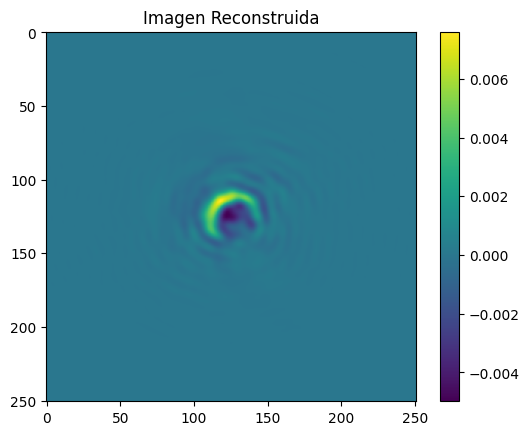

In [28]:
import numpy as np

def compute_gradient(image, visibilities, weights, u_coords, v_coords):
    """Calcula el gradiente de la función objetivo con respecto a la imagen."""
    F_image = np.fft.fft2(image)
    residual = visibilities - F_image
    gradient = np.fft.ifft2(weights * residual).real
    return gradient

def compute_fletcher_reeves_beta(grad, grad_prev):
    """Calcula el parámetro beta de Fletcher-Reeves para la actualización del gradiente conjugado."""
    numerator = np.sum(grad ** 2)
    denominator = np.sum(grad_prev ** 2)
    return numerator / denominator if denominator != 0 else 0

def line_search(image, direction, visibilities, weights, u_coords, v_coords, alpha_init=1.5, tol=1e-5):
    """Realiza la búsqueda de línea para encontrar el mejor paso en la dirección del gradiente conjugado."""
    alpha = alpha_init
    while alpha > tol:
        new_image = image + alpha * direction
        F_image = np.fft.fft2(new_image)
        loss = np.sum(weights * np.abs(visibilities - F_image) ** 2)
        if loss < np.sum(weights * np.abs(visibilities - np.fft.fft2(image)) ** 2):
            return alpha
        alpha *= 0.5  # Reduce el paso si la función no disminuye
    return alpha

def conjugate_gradient_reconstruction(image, visibilities, weights, u_coords, v_coords, max_iter=251, tol=1e-1):
    """Aplica el método de gradiente conjugado con Fletcher-Reeves para la reconstrucción de la imagen."""
    grad = compute_gradient(image, visibilities, weights, u_coords, v_coords)
    print("Norma del gradiente inicial:", np.linalg.norm(grad))

    direction = -grad
    for _ in range(max_iter):
        alpha = line_search(image, direction, visibilities, weights, u_coords, v_coords)
        new_image = image + alpha * direction
        
        if np.linalg.norm(new_image - image) < tol:
            break
        
        new_grad = compute_gradient(new_image, visibilities, weights, u_coords, v_coords)
        beta = compute_fletcher_reeves_beta(new_grad, grad)
        direction = -new_grad + beta * direction
        
        image = new_image
        grad = new_grad
        
    return image

# Parámetros de entrada simulados
image_dirty = dirty_image_dc # Imagen inicial sucia
visibilities = visibilidades_dc  # Visibilidades extrapoladas
weights = pesos_dc # Pesos uniformes
u_coords = u_data_dc  # Coordenadas u
v_coords = v_data_dc  # Coordenadas v

# Reconstrucción de la imagen
image_reconstructed = conjugate_gradient_reconstruction(image_dirty, visibilities, weights, u_coords, v_coords)

# Visualización de la imagen reconstruida (opcional)
import matplotlib.pyplot as plt
plt.imshow(image_reconstructed, cmap='viridis')
plt.title("Imagen Reconstruida")
plt.colorbar()
plt.show()


In [13]:
import numpy as np
import time

def objective_function(image, visibilities, weights, u, v):
    """
    Calcula el valor de la función objetivo.
    
    Parameters:
    -----------
    image : np.ndarray
        La imagen actual.
    visibilities : np.ndarray
        Las visibilidades extrapoladas.
    weights : np.ndarray
        Los pesos de las visibilidades.
    u : np.ndarray
        Coordenadas u (parte real).
    v : np.ndarray
        Coordenadas v (parte imaginaria).
    
    Returns:
    --------
    float
        El valor de la función objetivo.
    """
    # Simular las visibilidades a partir de la imagen actual
    simulated_visibilities = simulate_visibilities(image, u, v)
    
    # Calcular la diferencia entre las visibilidades observadas y simuladas
    diff = visibilities - simulated_visibilities
    
    # Calcular la función objetivo (chi-cuadrado)
    chi_squared = np.sum(weights * np.abs(diff)**2)
    
    return chi_squared

def gradient(image, visibilities, weights, u, v):
    """
    Calcula el gradiente de la función objetivo.
    
    Parameters:
    -----------
    image : np.ndarray
        La imagen actual.
    visibilities : np.ndarray
        Las visibilidades extrapoladas.
    weights : np.ndarray
        Los pesos de las visibilidades.
    u : np.ndarray
        Coordenadas u (parte real).
    v : np.ndarray
        Coordenadas v (parte imaginaria).
    
    Returns:
    --------
    np.ndarray
        El gradiente de la función objetivo.
    """
    # Simular las visibilidades a partir de la imagen actual
    simulated_visibilities = simulate_visibilities(image, u, v)
    
    # Calcular la diferencia entre las visibilidades observadas y simuladas
    diff = visibilities - simulated_visibilities
    
    # Calcular el gradiente
    grad = -2 * np.sum(weights * np.conj(diff) * simulate_visibilities_gradient(image, u, v), axis=0)
    
    return grad

def line_search(image, direction, visibilities, weights, u, v, max_iter=100, alpha=1.0, beta=0.5):
    """
    Realiza la búsqueda de línea para encontrar el tamaño de paso óptimo.
    
    Parameters:
    -----------
    image : np.ndarray
        La imagen actual.
    direction : np.ndarray
        La dirección de búsqueda.
    visibilities : np.ndarray
        Las visibilidades extrapoladas.
    weights : np.ndarray
        Los pesos de las visibilidades.
    u : np.ndarray
        Coordenadas u (parte real).
    v : np.ndarray
        Coordenadas v (parte imaginaria).
    max_iter : int, optional
        Número máximo de iteraciones para la búsqueda de línea.
    alpha : float, optional
        Tamaño de paso inicial.
    beta : float, optional
        Factor de reducción del tamaño de paso.
    
    Returns:
    --------
    float
        El tamaño de paso óptimo.
    """
    for i in range(max_iter):
        new_image = image + alpha * direction
        f_new = objective_function(new_image, visibilities, weights, u, v)
        f_old = objective_function(image, visibilities, weights, u, v)
        
        if f_new < f_old:
            print(f"Line search: alpha = {alpha}")  # Imprimir el valor de alpha
            return alpha
        
        alpha *= beta
    
    return alpha

def fletcher_reeves(grad, grad_prev, direction_prev):
    """
    Calcula el parámetro de Fletcher-Reeves para actualizar la dirección de búsqueda.
    
    Parameters:
    -----------
    grad : np.ndarray
        El gradiente actual.
    grad_prev : np.ndarray
        El gradiente anterior.
    direction_prev : np.ndarray
        La dirección de búsqueda anterior.
    
    Returns:
    --------
    float
        El parámetro de Fletcher-Reeves.
    """
    norm2_grad = np.sum(np.abs(grad)**2)
    norm2_grad_prev = np.sum(np.abs(grad_prev)**2)
    
    if norm2_grad_prev == 0.0:
        return 0.0
    
    return norm2_grad / norm2_grad_prev


def conjugate_gradient(image, visibilities, weights, u, v, max_iter=100, ftol=1e-6, gtol=1e-6, verbose=True):
    """
    Implementa el algoritmo de Gradiente Conjugado No Lineal utilizando el método de Fletcher-Reeves.
    
    Parameters:
    -----------
    image : np.ndarray
        La imagen inicial.
    visibilities : np.ndarray
        Las visibilidades extrapoladas.
    weights : np.ndarray
        Los pesos de las visibilidades.
    u : np.ndarray
        Coordenadas u (parte real).
    v : np.ndarray
        Coordenadas v (parte imaginaria).
    max_iter : int, optional
        Número máximo de iteraciones.
    ftol : float, optional
        Tolerancia para la función objetivo.
    gtol : float, optional
        Tolerancia para el gradiente.
    verbose : bool, optional
        Si es True, imprime información de la ejecución.
    
    Returns:
    --------
    np.ndarray
        La imagen reconstruida.
    """
    x = image.copy()
    
    # Calcular la función objetivo y el gradiente inicial
    f_prev = objective_function(x, visibilities, weights, u, v)
    g_prev = gradient(x, visibilities, weights, u, v)
    d_prev = -g_prev  # Dirección inicial de búsqueda
    
    for it in range(max_iter):
        if verbose:
            print(f"Iteration {it+1}")
            print(f"Function value = {f_prev:.04f}")  # Imprimir el valor de la función objetivo
            print(f"Gradient norm = {np.linalg.norm(g_prev):.04f}")  # Imprimir la norma del gradiente
        
        # Búsqueda de línea
        alpha = line_search(x, d_prev, visibilities, weights, u, v)
        
        # Actualizar la imagen
        x = x + alpha * d_prev
        
        # Calcular la función objetivo y el gradiente en la nueva posición
        f_it = objective_function(x, visibilities, weights, u, v)
        g_it = gradient(x, visibilities, weights, u, v)
        
        # Verificar criterios de parada
        if 2.0 * abs(f_it - f_prev) <= ftol * (abs(f_it) + abs(f_prev)):
            if verbose:
                print("Exit due to tolerance")
            return x
        
        if np.max(np.abs(g_it)) <= gtol:
            if verbose:
                print("Exit due to gradient tolerance")
            return x
        
        # Calcular el parámetro de Fletcher-Reeves
        beta = fletcher_reeves(g_it, g_prev, d_prev)
        
        # Actualizar la dirección de búsqueda
        d_it = -g_it + beta * d_prev
        
        # Actualizar valores para la siguiente iteración
        f_prev, g_prev, d_prev = f_it, g_it, d_it
    
    if verbose:
        print("Too many iterations in optimizer")
    
    return x

# Funciones auxiliares (simulación de visibilidades y gradiente)


def simulate_visibilities(image, u, v):
    """
    Simula las visibilidades a partir de la imagen y las coordenadas u, v.
    
    Parameters:
    -----------
    image : np.ndarray
        La imagen (2D array).
    u : np.ndarray
        Coordenadas u (parte real).
    v : np.ndarray
        Coordenadas v (parte imaginaria).
    
    Returns:
    --------
    np.ndarray
        Las visibilidades simuladas.
    """
    # Obtener las dimensiones de la imagen
    nx, ny = image.shape
    
    # Crear una cuadrícula de frecuencias en el espacio de Fourier
    u_grid = np.fft.fftfreq(nx).reshape(-1, 1) * nx
    v_grid = np.fft.fftfreq(ny).reshape(-1, 1) * ny
    
    # Calcular la transformada de Fourier de la imagen
    image_fft = np.fft.fft2(image)
    
    # Crear una cuadrícula de puntos (u, v) para la interpolación
    points = np.array(np.meshgrid(u_grid, v_grid)).T.reshape(-1, 2)
    
    # Interpolar la transformada de Fourier en las coordenadas (u, v)
    visibilities = griddata(points, image_fft.flatten(), (u, v), method='cubic')
    
    return visibilities

def simulate_visibilities_gradient(image, u, v):
    """
    Simula el gradiente de las visibilidades con respecto a la imagen.
    
    Parameters:
    -----------
    image : np.ndarray
        La imagen (2D array).
    u : np.ndarray
        Coordenadas u (parte real).
    v : np.ndarray
        Coordenadas v (parte imaginaria).
    
    Returns:
    --------
    np.ndarray
        El gradiente de las visibilidades simuladas.
    """
    # Obtener las dimensiones de la imagen
    nx, ny = image.shape
    
    # Crear una cuadrícula de frecuencias en el espacio de Fourier
    u_grid = np.fft.fftfreq(nx).reshape(-1, 1) * nx
    v_grid = np.fft.fftfreq(ny).reshape(-1, 1) * ny
    
    # Calcular la transformada de Fourier de la imagen
    image_fft = np.fft.fft2(image)
    
    # Calcular el gradiente de la transformada de Fourier
    # El gradiente es la transformada de Fourier multiplicada por un factor de fase
    phase_factor = -2j * np.pi * (u_grid * u + v_grid * v)
    gradient_fft = image_fft * phase_factor
    
    # Crear una cuadrícula de puntos (u, v) para la interpolación
    points = np.array(np.meshgrid(u_grid, v_grid)).T.reshape(-1, 2)
    
    # Interpolar el gradiente en las coordenadas (u, v)
    gradient = griddata(points, gradient_fft.flatten(), (u, v), method='cubic')
    
    return gradient

In [14]:
# Ejemplo de uso
image = dirty_image_dc  # Imagen inicial (aleatoria)
visibilities = visibilidades_dc  # Visibilidades extrapoladas
weights = pesos_dc  # Pesos de las visibilidades
u = u_data_dc  # Coordenadas u
v = v_data_dc  # Coordenadas v


# Reconstruir la imagen
reconstructed_image = conjugate_gradient(image, visibilities, weights, u, v, max_iter=251, ftol=1e-3, verbose=True)

Iteration 1
Function value = 479.4436
Gradient norm = 139.3262
Line search: alpha = 2.117582368135751e-22
Exit due to tolerance


Exit due to function tolerance at iteration 5


/tmp/ipykernel_45801/1812119616.py:57: RuntimeWarning: overflow encountered in square
  f_new = np.sum(weights * np.abs(vis_observed - compute_visibilities(image_new, u, v))**2)


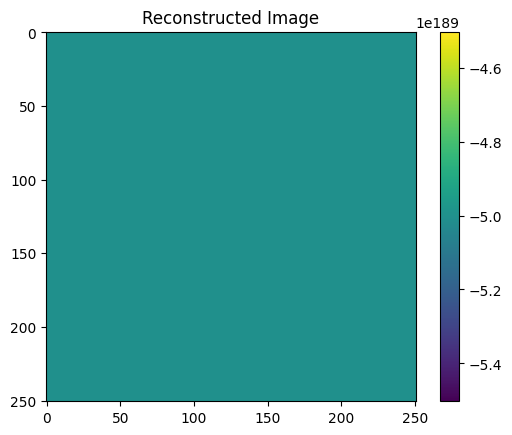

In [25]:
import numpy as np

def compute_visibilities(image, u, v):
    """
    Calcula las visibilidades a partir de una imagen y coordenadas (u, v).
    Utiliza la Transformada de Fourier No Uniforme (NUFFT).
    """
    # Obtener dimensiones de la imagen
    nx, ny = image.shape
    x = np.fft.fftfreq(nx)[:, np.newaxis]  # Frecuencias en x
    y = np.fft.fftfreq(ny)[np.newaxis, :]  # Frecuencias en y

    # Calcular la Transformada de Fourier No Uniforme (NUFFT)
    visibilities = np.sum(image * np.exp(-2j * np.pi * (u * x + v * y)), axis=(0, 1))
    return visibilities


def compute_gradient(image, u, v, vis_observed, weights):
    """
    Calcula el gradiente de la función objetivo con respecto a la imagen.
    """
    # Obtener dimensiones de la imagen
    nx, ny = image.shape
    x = np.fft.fftfreq(nx)[:, np.newaxis]  # Frecuencias en x
    y = np.fft.fftfreq(ny)[np.newaxis, :]  # Frecuencias en y

    # Calcular las visibilidades actuales
    vis_current = compute_visibilities(image, u, v)

    # Calcular el residuo (diferencia entre visibilidades observadas y calculadas)
    residual = vis_current - vis_observed

    # Calcular el gradiente utilizando la Transformada Inversa de Fourier No Uniforme (INUFFT)
    gradient = np.sum(weights * residual * np.exp(2j * np.pi * (u * x + v * y)), axis=(0, 1))
    return gradient.real  # Tomar la parte real para obtener una imagen real


def conjugate_gradient_nonlinear(image, u, v, vis_observed, weights, max_iter=100, ftol=1e-6, gtol=1e-6):
    """
    Algoritmo de Gradiente Conjugado No Lineal para reconstruir una imagen a partir de visibilidades.
    """
    # Calcular el gradiente inicial
    gradient = compute_gradient(image, u, v, vis_observed, weights)
    direction = -gradient  # Dirección inicial de búsqueda

    # Almacenar el valor de la función objetivo anterior
    f_prev = np.sum(weights * np.abs(vis_observed - compute_visibilities(image, u, v))**2)

    for it in range(max_iter):
        # Búsqueda de línea (en este caso, un paso fijo para simplificar)
        alpha = 0.001  # Tamaño del paso (puede optimizarse con una búsqueda de línea)

        # Actualizar la imagen
        image_new = image + alpha * direction

        # Calcular el valor de la función objetivo
        f_new = np.sum(weights * np.abs(vis_observed - compute_visibilities(image_new, u, v))**2)

        # Verificar criterio de parada basado en la función
        if 2.0 * abs(f_new - f_prev) <= ftol * (abs(f_new) + abs(f_prev) + 1e-10):
            print(f"Exit due to function tolerance at iteration {it}")
            return image_new

        # Calcular el nuevo gradiente
        gradient_new = compute_gradient(image_new, u, v, vis_observed, weights)

        # Verificar criterio de parada basado en el gradiente
        if np.max(np.abs(gradient_new)) <= gtol:
            print(f"Exit due to gradient tolerance at iteration {it}")
            return image_new

        # Calcular el parámetro de gradiente conjugado (Fletcher-Reeves)
        beta = np.sum(gradient_new**2) / np.sum(gradient**2)

        # Actualizar la dirección de búsqueda
        direction = -gradient_new + beta * direction

        # Actualizar valores para la siguiente iteración
        image, gradient, f_prev = image_new, gradient_new, f_new

    print("Too many iterations in optimizer")
    return image




# Datos de entrada (simulados)
image = dirty_image_dc
u = u_data_dc  # Coordenadas u
v = v_data_dc  # Coordenadas v
weights = pesos_dc  # Pesos de las visibilidades
vis_observed = visibilidades_dc  # Visibilidades observadas


# Reconstruir la imagen
reconstructed_image = conjugate_gradient_nonlinear(image, u, v, vis_observed, weights)

# Visualizar la imagen reconstruida (requiere matplotlib)
import matplotlib.pyplot as plt
plt.imshow(reconstructed_image, cmap='viridis')
plt.colorbar()
plt.title("Reconstructed Image")
plt.show()

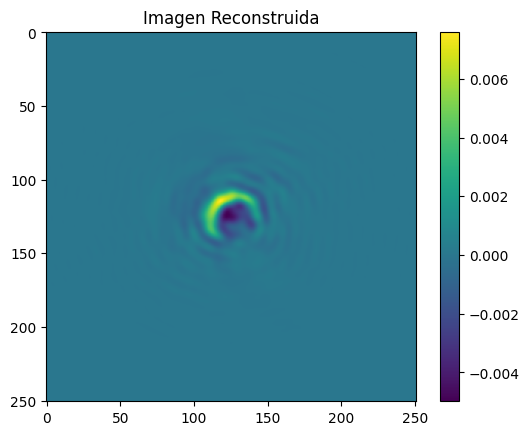

In [11]:
# Visualización de la imagen reconstruida (opcional)
import matplotlib.pyplot as plt
plt.imshow(np.real(reconstructed_image), cmap='viridis')
plt.title("Imagen Reconstruida")
plt.colorbar()
plt.show()

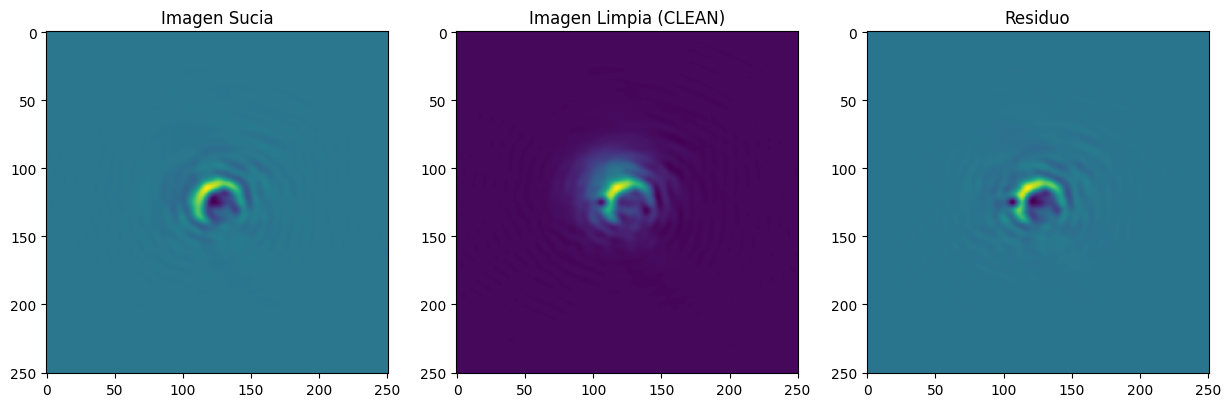

In [123]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import fftconvolve

def generate_gaussian_beam(size, fwhm):
    """
    Genera un haz Gaussiano (PSF) para la restauración.
    :param size: Tamaño del haz (tamaño de la imagen).
    :param fwhm: Ancho a mitad del máximo (FWHM) del haz.
    :return: Haz Gaussiano.
    """
    x, y = np.meshgrid(np.arange(size) - size // 2, np.arange(size) - size // 2)
    sigma = fwhm / (2 * np.sqrt(2 * np.log(2)))  # Convertir FWHM a sigma
    beam = np.exp(-(x**2 + y**2) / (2 * sigma**2))
    return beam / np.max(beam)  # Normalizar

def clean_algorithm(visibilities, weights, image_size, loop_gain=0.1, max_iter=1000, threshold=0.01, fwhm=3):
    """
    Implementación del algoritmo CLEAN.
    :param visibilities: Visibilidades (datos en el espacio de Fourier).
    :param weights: Pesos de las visibilidades.
    :param image_size: Tamaño de la imagen de salida.
    :param loop_gain: Ganancia del bucle (fracción del pico a restar en cada iteración).
    :param max_iter: Número máximo de iteraciones.
    :param threshold: Umbral de residuo para detener el algoritmo.
    :param fwhm: Ancho a mitad del máximo (FWHM) del haz de restauración.
    :return: Imagen limpia, residuo, componentes CLEAN.
    """
    # Paso 1: Calcular la imagen sucia (transformada inversa de Fourier)
    dirty_image = np.fft.ifft2(np.fft.ifftshift(visibilities * weights)).real
    dirty_image = np.fft.fftshift(dirty_image)  # Aplicar fftshift para corregir el orden
    dirty_image = dirty_image / np.max(dirty_image)  # Normalizar

    # Paso 2: Calcular el PSF (haz sintético)
    psf = np.fft.ifft2(np.fft.ifftshift(weights)).real
    psf = np.fft.fftshift(psf)  # Aplicar fftshift para corregir el orden
    psf = psf / np.max(psf)  # Normalizar

    # Inicializar variables
    clean_components = np.zeros_like(dirty_image)  # Componentes CLEAN
    residual = dirty_image.copy()  # Residuo inicial
    beam = generate_gaussian_beam(image_size, fwhm)  # Haz de restauración

    # Iteraciones CLEAN
    for i in range(max_iter):
        # Encontrar el pico más brillante en el residuo
        max_pos = np.unravel_index(np.argmax(np.abs(residual)), residual.shape)
        max_value = residual[max_pos]

        # Verificar el criterio de parada
        if np.abs(max_value) < threshold:
            print(f"Criterio de parada alcanzado en la iteración {i}.")
            break

        # Agregar el componente CLEAN
        clean_components[max_pos] += loop_gain * max_value

        # Restar el componente CLEAN del residuo
        residual -= loop_gain * max_value * np.roll(psf, (max_pos[0] - image_size // 2, max_pos[1] - image_size // 2))

    # Paso 3: Restaurar la imagen limpia
    clean_image = fftconvolve(clean_components, beam, mode="same")  # Usar fftconvolve de SciPy
    clean_image_convolved = fftconvolve(clean_components, beam, mode="same")
    final_image = clean_image_convolved + residual


    return final_image, residual, clean_components

# Parámetros
image_size = 251
fwhm = 40  # Ancho del haz de restauración
loop_gain = 0.00001  # Ganancia del bucle
max_iter = 100000 # Máximo de iteraciones
threshold = 0.2  # Umbral de residuo


# Generar datos de ejemplo (visibilidades y pesos)

visibilities = visibilidades_dc
weights = pesos_dc 

# Aplicar CLEAN
clean_image, residual, components = clean_algorithm(visibilities, weights, image_size, loop_gain, max_iter, threshold, fwhm)

# Visualizar resultados
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.title("Imagen Sucia")
plt.imshow(np.fft.fftshift(np.fft.ifft2(np.fft.ifftshift(visibilities * weights))).real, cmap="viridis")

plt.subplot(1, 3, 2)
plt.title("Imagen Limpia (CLEAN)")
plt.imshow(clean_image, cmap="viridis")

plt.subplot(1, 3, 3)
plt.title("Residuo")
plt.imshow(residual, cmap="viridis")

plt.show()



###### fits_image = fits.open("/home/stephan/polynomial_preprocessing/datasets/HD142/dirty_images_natural_251.fits")
header = fits_image[0].header
fits.writeto("/home/stephan/polynomial_preprocessing/datasets/HD142/dirty_images_natural_251_TESTING_2.fits", image_reconstructed, header,overwrite=True)

In [2]:
ejemplo_opti_dc_1 = optimizacion_parametros_continuos.OptimizacionParametrosContinuos(
    "/home/stephan/polynomial_preprocessing/datasets/pyralysis-development-datasets/FREQ78/mod_in_0.fits",
    "/home/stephan/polynomial_preprocessing/datasets/pyralysis-development-datasets/FREQ78/FREQ78.ms",   
	[5, 16],
	[1e-4, 1e-1],
	-1.38 * (10 ** (-7/2)),
	None)

ejemplo_opti_dc_1.initialize_optimization(50)

[I 2025-02-21 00:47:48,998] A new study created in memory with name: no-name-56e26105-d3e5-43f4-9793-33d0c69d8bc2


Image size of FITS:  512
New S: 13
Division: 0.041107593021724016
Sigma: 10390.226880758031


[I 2025-02-21 00:47:56,955] Trial 0 finished with value: 105.12127685546875 and parameters: {'S': 13, 'division': 0.041107593021724016}. Best is trial 0 with value: 105.12127685546875.


El tiempo de ejecución fue de:  7.115442752838135
New S: 6
Division: 0.09960181218948495
Sigma: 4288.24745884161


[I 2025-02-21 00:47:57,810] Trial 1 finished with value: 98.89764404296875 and parameters: {'S': 6, 'division': 0.09960181218948495}. Best is trial 1 with value: 98.89764404296875.


El tiempo de ejecución fue de:  0.5547776222229004
New S: 11
Division: 0.00965391785450602
Sigma: 44242.88920360129


[I 2025-02-21 00:48:01,678] Trial 2 finished with value: 102.19354248046875 and parameters: {'S': 11, 'division': 0.00965391785450602}. Best is trial 1 with value: 98.89764404296875.


El tiempo de ejecución fue de:  3.567152738571167
New S: 12
Division: 0.0718657483138392
Sigma: 5943.265436440576


[I 2025-02-21 00:48:06,732] Trial 3 finished with value: 106.38983154296875 and parameters: {'S': 12, 'division': 0.0718657483138392}. Best is trial 1 with value: 98.89764404296875.


El tiempo de ejecución fue de:  4.74030613899231
New S: 6
Division: 0.033521215413908186
Sigma: 12741.698436160052


[I 2025-02-21 00:48:07,638] Trial 4 finished with value: 98.42840576171875 and parameters: {'S': 6, 'division': 0.033521215413908186}. Best is trial 4 with value: 98.42840576171875.


El tiempo de ejecución fue de:  0.5876986980438232
New S: 13
Division: 0.05748161158359659
Sigma: 7430.501794411479


[I 2025-02-21 00:48:14,922] Trial 5 finished with value: 105.11541748046875 and parameters: {'S': 13, 'division': 0.05748161158359659}. Best is trial 4 with value: 98.42840576171875.


El tiempo de ejecución fue de:  6.962236166000366
New S: 6
Division: 0.05500722790255988
Sigma: 7764.747185118582


[I 2025-02-21 00:48:15,778] Trial 6 finished with value: 98.27655029296875 and parameters: {'S': 6, 'division': 0.05500722790255988}. Best is trial 6 with value: 98.27655029296875.


El tiempo de ejecución fue de:  0.564598798751831
New S: 7
Division: 0.09056663134468078
Sigma: 4716.05503788746


[I 2025-02-21 00:48:16,970] Trial 7 finished with value: 99.90985107421875 and parameters: {'S': 7, 'division': 0.09056663134468078}. Best is trial 6 with value: 98.27655029296875.


El tiempo de ejecución fue de:  0.8888046741485596
New S: 6
Division: 0.07558570986192228
Sigma: 5650.766775860451


[I 2025-02-21 00:48:17,827] Trial 8 finished with value: 98.33026123046875 and parameters: {'S': 6, 'division': 0.07558570986192228}. Best is trial 6 with value: 98.27655029296875.


El tiempo de ejecución fue de:  0.5630936622619629
New S: 9
Division: 0.05941904669345536
Sigma: 7188.220642803118


[I 2025-02-21 00:48:19,995] Trial 9 finished with value: 101.25701904296875 and parameters: {'S': 9, 'division': 0.05941904669345536}. Best is trial 6 with value: 98.27655029296875.


El tiempo de ejecución fue de:  1.8707475662231445
New S: 16
Division: 0.02143199104300455
Sigma: 19928.956537940983


[I 2025-02-21 00:48:32,179] Trial 10 finished with value: 106.47869873046875 and parameters: {'S': 16, 'division': 0.02143199104300455}. Best is trial 6 with value: 98.27655029296875.


El tiempo de ejecución fue de:  11.86621642112732
New S: 8
Division: 0.07673540483374625
Sigma: 5566.103664181661


[I 2025-02-21 00:48:33,801] Trial 11 finished with value: 107.32684326171875 and parameters: {'S': 8, 'division': 0.07673540483374625}. Best is trial 6 with value: 98.27655029296875.


El tiempo de ejecución fue de:  1.2738356590270996
New S: 5
Division: 0.07486388524110141
Sigma: 5705.250490834589


[I 2025-02-21 00:48:34,466] Trial 12 finished with value: 100.94354248046875 and parameters: {'S': 5, 'division': 0.07486388524110141}. Best is trial 6 with value: 98.27655029296875.


El tiempo de ejecución fue de:  0.37674498558044434
New S: 9
Division: 0.05482459131963872
Sigma: 7790.613805534752


[I 2025-02-21 00:48:36,600] Trial 13 finished with value: 101.36785888671875 and parameters: {'S': 9, 'division': 0.05482459131963872}. Best is trial 6 with value: 98.27655029296875.


El tiempo de ejecución fue de:  1.8297505378723145
New S: 5
Division: 0.04034629835286356
Sigma: 10586.280165829976


[I 2025-02-21 00:48:37,246] Trial 14 finished with value: 103.65301513671875 and parameters: {'S': 5, 'division': 0.04034629835286356}. Best is trial 6 with value: 98.27655029296875.


El tiempo de ejecución fue de:  0.33730363845825195
New S: 8
Division: 0.06787235472640393
Sigma: 6292.948281215585


[I 2025-02-21 00:48:38,761] Trial 15 finished with value: 107.35760498046875 and parameters: {'S': 8, 'division': 0.06787235472640393}. Best is trial 6 with value: 98.27655029296875.


El tiempo de ejecución fue de:  1.2270336151123047
New S: 10
Division: 0.08351351929629686
Sigma: 5114.348211122715


[I 2025-02-21 00:48:41,580] Trial 16 finished with value: 103.45379638671875 and parameters: {'S': 10, 'division': 0.08351351929629686}. Best is trial 6 with value: 98.27655029296875.


El tiempo de ejecución fue de:  2.5082385540008545
New S: 7
Division: 0.04747128665787448
Sigma: 8997.380271063887


[I 2025-02-21 00:48:42,754] Trial 17 finished with value: 99.63690185546875 and parameters: {'S': 7, 'division': 0.04747128665787448}. Best is trial 6 with value: 98.27655029296875.


El tiempo de ejecución fue de:  0.8704438209533691
New S: 16
Division: 0.027923943568697825
Sigma: 15295.734177616941


[I 2025-02-21 00:49:02,539] Trial 18 finished with value: 106.46795654296875 and parameters: {'S': 16, 'division': 0.027923943568697825}. Best is trial 6 with value: 98.27655029296875.


El tiempo de ejecución fue de:  19.453094720840454
New S: 5
Division: 0.06412246551924874
Sigma: 6660.960625248619


[I 2025-02-21 00:49:03,282] Trial 19 finished with value: 102.46160888671875 and parameters: {'S': 5, 'division': 0.06412246551924874}. Best is trial 6 with value: 98.27655029296875.


El tiempo de ejecución fue de:  0.43703675270080566
New S: 7
Division: 0.0873619768407018
Sigma: 4889.051661415529


[I 2025-02-21 00:49:04,808] Trial 20 finished with value: 99.96307373046875 and parameters: {'S': 7, 'division': 0.0873619768407018}. Best is trial 6 with value: 98.27655029296875.


El tiempo de ejecución fue de:  1.189424991607666
New S: 6
Division: 0.028711820448670315
Sigma: 14876.00616551496


[I 2025-02-21 00:49:05,851] Trial 21 finished with value: 98.69256591796875 and parameters: {'S': 6, 'division': 0.028711820448670315}. Best is trial 6 with value: 98.27655029296875.


El tiempo de ejecución fue de:  0.7205650806427002
New S: 6
Division: 0.04574444293632432
Sigma: 9337.029606243535


[I 2025-02-21 00:49:06,886] Trial 22 finished with value: 98.27947998046875 and parameters: {'S': 6, 'division': 0.04574444293632432}. Best is trial 6 with value: 98.27655029296875.


El tiempo de ejecución fue de:  0.7018246650695801
New S: 9
Division: 0.04413124894304046
Sigma: 9678.339685533303


[I 2025-02-21 00:49:09,115] Trial 23 finished with value: 101.51776123046875 and parameters: {'S': 9, 'division': 0.04413124894304046}. Best is trial 6 with value: 98.27655029296875.


El tiempo de ejecución fue de:  1.9226596355438232
New S: 8
Division: 0.05383881635910889
Sigma: 7933.257952193351


[I 2025-02-21 00:49:10,718] Trial 24 finished with value: 107.42889404296875 and parameters: {'S': 8, 'division': 0.05383881635910889}. Best is trial 6 with value: 98.27655029296875.


El tiempo de ejecución fue de:  1.2792069911956787
New S: 6
Division: 0.013353947549236994
Sigma: 31984.341442316236


[I 2025-02-21 00:49:11,539] Trial 25 finished with value: 99.44940185546875 and parameters: {'S': 6, 'division': 0.013353947549236994}. Best is trial 6 with value: 98.27655029296875.


El tiempo de ejecución fue de:  0.5205996036529541
New S: 7
Division: 0.07904561485523144
Sigma: 5403.427107244652


[I 2025-02-21 00:49:12,735] Trial 26 finished with value: 99.87469482421875 and parameters: {'S': 7, 'division': 0.07904561485523144}. Best is trial 6 with value: 98.27655029296875.


El tiempo de ejecución fue de:  0.9042961597442627
New S: 5
Division: 0.06303845939049606
Sigma: 6775.502164032456


[I 2025-02-21 00:49:13,357] Trial 27 finished with value: 102.38983154296875 and parameters: {'S': 5, 'division': 0.06303845939049606}. Best is trial 6 with value: 98.27655029296875.


El tiempo de ejecución fue de:  0.3280754089355469
New S: 10
Division: 0.04933702451314173
Sigma: 8657.133709062824


[I 2025-02-21 00:49:16,200] Trial 28 finished with value: 103.52069091796875 and parameters: {'S': 10, 'division': 0.04933702451314173}. Best is trial 6 with value: 98.27655029296875.


El tiempo de ejecución fue de:  2.5422523021698
New S: 14
Division: 0.04110588273363214
Sigma: 10390.659185823008


[I 2025-02-21 00:49:25,278] Trial 29 finished with value: 108.36151123046875 and parameters: {'S': 14, 'division': 0.04110588273363214}. Best is trial 6 with value: 98.27655029296875.


El tiempo de ejecución fue de:  8.772029638290405
New S: 8
Division: 0.036186715444042256
Sigma: 11803.149658002418


[I 2025-02-21 00:49:26,843] Trial 30 finished with value: 107.43621826171875 and parameters: {'S': 8, 'division': 0.036186715444042256}. Best is trial 6 with value: 98.27655029296875.


El tiempo de ejecución fue de:  1.259582757949829
New S: 6
Division: 0.03403362467436323
Sigma: 12549.859796136143


[I 2025-02-21 00:49:27,687] Trial 31 finished with value: 98.34979248046875 and parameters: {'S': 6, 'division': 0.03403362467436323}. Best is trial 6 with value: 98.27655029296875.


El tiempo de ejecución fue de:  0.5483174324035645
New S: 6
Division: 0.023543886065112762
Sigma: 18141.32199061559


[I 2025-02-21 00:49:28,583] Trial 32 finished with value: 98.76922607421875 and parameters: {'S': 6, 'division': 0.023543886065112762}. Best is trial 6 with value: 98.27655029296875.


El tiempo de ejecución fue de:  0.5788719654083252
New S: 7
Division: 0.0013472333352878285
Sigma: 317032.84563273296


[I 2025-02-21 00:49:29,833] Trial 33 finished with value: 99.45135498046875 and parameters: {'S': 7, 'division': 0.0013472333352878285}. Best is trial 6 with value: 98.27655029296875.


El tiempo de ejecución fue de:  0.9383716583251953
New S: 6
Division: 0.09277956580615601
Sigma: 4603.569916569263


[I 2025-02-21 00:49:30,810] Trial 34 finished with value: 98.73455810546875 and parameters: {'S': 6, 'division': 0.09277956580615601}. Best is trial 6 with value: 98.27655029296875.


El tiempo de ejecución fue de:  0.664517879486084
New S: 5
Division: 0.09711982695299798
Sigma: 4397.837510813167


[I 2025-02-21 00:49:31,504] Trial 35 finished with value: 99.79119873046875 and parameters: {'S': 5, 'division': 0.09711982695299798}. Best is trial 6 with value: 98.27655029296875.


El tiempo de ejecución fue de:  0.39418888092041016
New S: 6
Division: 0.03525958891806413
Sigma: 12113.505322200685


[I 2025-02-21 00:49:32,461] Trial 36 finished with value: 98.29168701171875 and parameters: {'S': 6, 'division': 0.03525958891806413}. Best is trial 6 with value: 98.27655029296875.


El tiempo de ejecución fue de:  0.6528098583221436
New S: 11
Division: 0.06819961653212156
Sigma: 6262.7510202554995


[I 2025-02-21 00:49:36,437] Trial 37 finished with value: 101.92938232421875 and parameters: {'S': 11, 'division': 0.06819961653212156}. Best is trial 6 with value: 98.27655029296875.


El tiempo de ejecución fue de:  3.673021078109741
New S: 7
Division: 0.047346177449969974
Sigma: 9021.155265784799


[I 2025-02-21 00:49:37,620] Trial 38 finished with value: 99.63641357421875 and parameters: {'S': 7, 'division': 0.047346177449969974}. Best is trial 6 with value: 98.27655029296875.


El tiempo de ejecución fue de:  0.8812611103057861
New S: 5
Division: 0.016747381360553072
Sigma: 25503.522540163427


[I 2025-02-21 00:49:38,265] Trial 39 finished with value: 103.40496826171875 and parameters: {'S': 5, 'division': 0.016747381360553072}. Best is trial 6 with value: 98.27655029296875.


El tiempo de ejecución fue de:  0.34116578102111816
New S: 6
Division: 0.06060541922259939
Sigma: 7047.508679855954


[I 2025-02-21 00:49:39,373] Trial 40 finished with value: 98.26287841796875 and parameters: {'S': 6, 'division': 0.06060541922259939}. Best is trial 40 with value: 98.26287841796875.


El tiempo de ejecución fue de:  0.608543872833252
New S: 6
Division: 0.05305580103038893
Sigma: 8050.339637185704


[I 2025-02-21 00:49:40,249] Trial 41 finished with value: 98.27020263671875 and parameters: {'S': 6, 'division': 0.05305580103038893}. Best is trial 40 with value: 98.26287841796875.


El tiempo de ejecución fue de:  0.5777337551116943
New S: 7
Division: 0.05217259022966754
Sigma: 8186.620908361595


[I 2025-02-21 00:49:41,542] Trial 42 finished with value: 99.66912841796875 and parameters: {'S': 7, 'division': 0.05217259022966754}. Best is trial 40 with value: 98.26287841796875.


El tiempo de ejecución fue de:  0.9953689575195312
New S: 6
Division: 0.05972484630085706
Sigma: 7151.415942805849


[I 2025-02-21 00:49:42,453] Trial 43 finished with value: 98.20526123046875 and parameters: {'S': 6, 'division': 0.05972484630085706}. Best is trial 43 with value: 98.20526123046875.


El tiempo de ejecución fue de:  0.5778770446777344
New S: 8
Division: 0.05817325801371897
Sigma: 7342.157420800659


[I 2025-02-21 00:49:44,159] Trial 44 finished with value: 107.39666748046875 and parameters: {'S': 8, 'division': 0.05817325801371897}. Best is trial 43 with value: 98.20526123046875.


El tiempo de ejecución fue de:  1.3689546585083008
New S: 13
Division: 0.060322443473116306
Sigma: 7080.56891309335


[I 2025-02-21 00:49:52,317] Trial 45 finished with value: 105.12567138671875 and parameters: {'S': 13, 'division': 0.060322443473116306}. Best is trial 43 with value: 98.20526123046875.


El tiempo de ejecución fue de:  7.840154409408569
New S: 6
Division: 0.0677812730054184
Sigma: 6301.40448945883


[I 2025-02-21 00:49:53,265] Trial 46 finished with value: 98.26727294921875 and parameters: {'S': 6, 'division': 0.0677812730054184}. Best is trial 43 with value: 98.20526123046875.


El tiempo de ejecución fue de:  0.5983970165252686
New S: 5
Division: 0.06737851267374502
Sigma: 6339.071627860529


[I 2025-02-21 00:49:53,914] Trial 47 finished with value: 101.22528076171875 and parameters: {'S': 5, 'division': 0.06737851267374502}. Best is trial 43 with value: 98.20526123046875.


El tiempo de ejecución fue de:  0.34150147438049316
New S: 12
Division: 0.07073302693262604
Sigma: 6038.441114988785


[I 2025-02-21 00:49:58,801] Trial 48 finished with value: 106.39373779296875 and parameters: {'S': 12, 'division': 0.07073302693262604}. Best is trial 43 with value: 98.20526123046875.


El tiempo de ejecución fue de:  4.577289342880249
New S: 7
Division: 0.05509474158734441
Sigma: 7752.413491956363


[I 2025-02-21 00:49:59,971] Trial 49 finished with value: 99.73065185546875 and parameters: {'S': 7, 'division': 0.05509474158734441}. Best is trial 43 with value: 98.20526123046875.


El tiempo de ejecución fue de:  0.8643739223480225
Mejores parámetros: {'S': 6, 'division': 0.05972484630085706}
Mejor valor (BRISQUE): 98.20526123046875


In [6]:
ejemplo_dc_doar25 = procesamiento_datos_continuos.ProcesamientoDatosContinuos(
    "/home/stephan/polynomial_preprocessing/datasets/pyralysis-development-datasets/M87/M87_original_lowfreq.fits",
    "/home/stephan/polynomial_preprocessing/datasets/pyralysis-development-datasets/M87/SR1_M87_2017_101_hilo_hops_netcal_StokesI.selfcal.final.ms", 
    10, 
    0.05972484630085706, 
    -5.5555555555555e-10, 
    None)

Pixel size of FITS:  -5.5555555555555e-10
Image size of FITS:  64


New S: 10
Division: 0.05972484630085706
Sigma: 712584.8313926808
El tiempo de ejecución fue de:  0.48537516593933105


/home/stephan/anaconda3/envs/pyralysis-env/lib/python3.12/site-packages/matplotlib/cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/home/stephan/anaconda3/envs/pyralysis-env/lib/python3.12/site-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


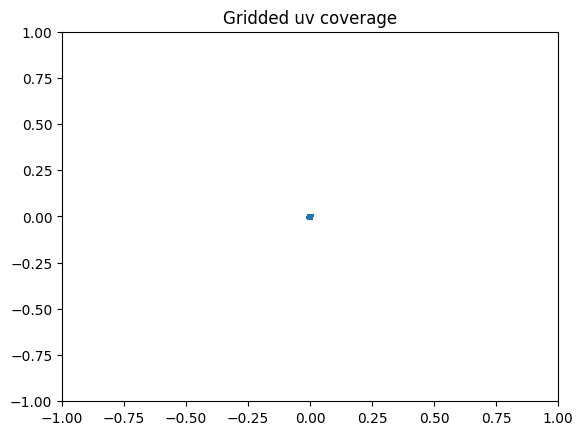

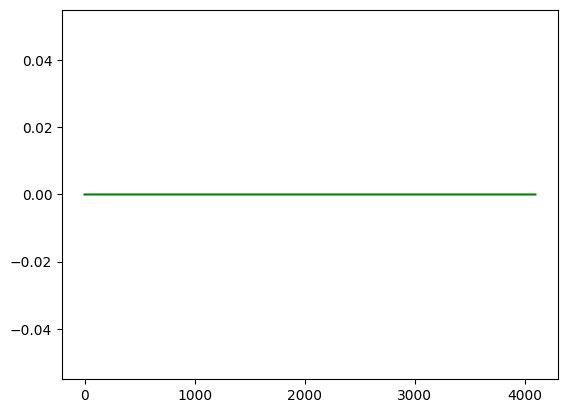

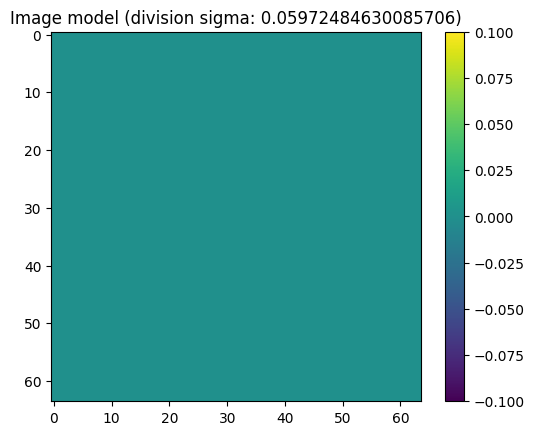

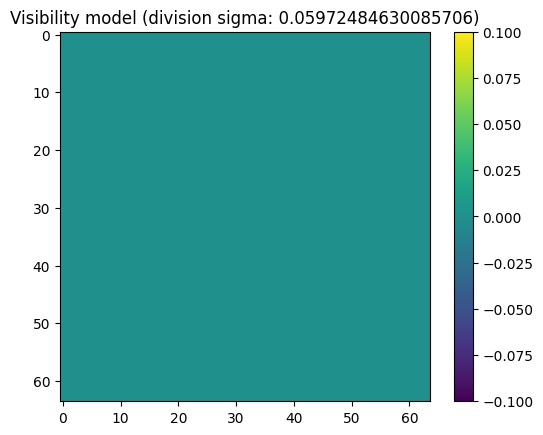

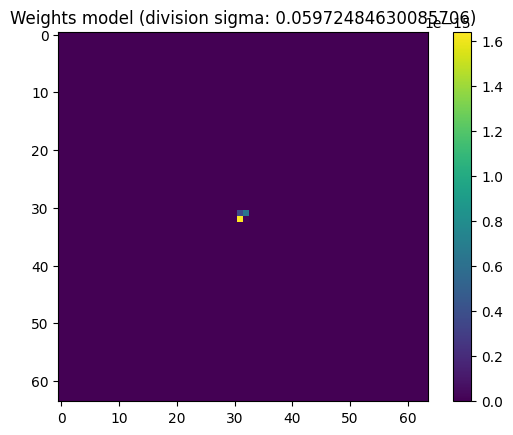

In [7]:
visibilidades_extrapoladas_dc_doar25, pesos_dc_doar25 = ejemplo_dc_doar25.data_processing()

In [5]:
print(visibilidades_extrapoladas_dc)

[[ 5.82871343e-06  8.37353557e-06  9.73375520e-06 ... -4.88806933e-06
  -1.24466260e-06  2.47786892e-06]
 [-2.04531230e-06  1.89811040e-06  5.61649931e-06 ... -1.00851297e-05
  -8.39974643e-06 -5.62744405e-06]
 [-9.04723138e-06 -5.80981801e-06 -1.64608647e-06 ... -9.73726689e-06
  -1.10452385e-05 -1.08550013e-05]
 ...
 [ 3.16961451e-06 -7.36808679e-07 -4.60738119e-06 ...  1.03321169e-05
   9.11104412e-06  6.60480599e-06]
 [ 9.23826741e-06  6.40757446e-06  2.61061549e-06 ...  9.11942238e-06
   1.06960219e-05  1.07343907e-05]
 [ 1.03761962e-05  1.01674205e-05  8.48671789e-06 ...  2.94620721e-06
   6.51799355e-06  9.10435530e-06]]


In [6]:
print(pesos_dc)

[[6.27948719e-20 6.74364723e-20 7.24185639e-20 ... 1.51318263e-19
  1.38753544e-19 1.27255478e-19]
 [6.86480122e-20 7.37670118e-20 7.92649381e-20 ... 1.63448017e-19
  1.49797232e-19 1.37312386e-19]
 [7.50566372e-20 8.07032277e-20 8.67716280e-20 ... 1.76572213e-19
  1.61739562e-19 1.48181532e-19]
 ...
 [1.44705673e-19 1.58431285e-19 1.73495253e-19 ... 1.56550336e-19
  1.44776660e-19 1.33888676e-19]
 [1.34538176e-19 1.47217237e-19 1.61124218e-19 ... 1.43113007e-19
  1.32439146e-19 1.22561468e-19]
 [1.25088933e-19 1.36801736e-19 1.49641196e-19 ... 1.30840096e-19
  1.21161951e-19 1.12199673e-19]]


## Ejemplo de optimización de parametros para datos grillados previamente:

In [ ]:
ejemplo_opti_gc = optimizacion_parametros_grillados.OptimizacionParametrosGrillados(
    "/home/stephan/polynomial_preprocessing/datasets/HD142/dirty_images_natural_251.fits",
    "/home/stephan/polynomial_preprocessing/datasets/HD142/hd142_b9cont_self_tav.ms", 
	[7, 21],
	[1e-3, 1e-1],
	2.5e-07, 
    129)

ejemplo_opti_gc.initialize_optimization(77)

In [ ]:
ejemplo_opti_gc = optimizacion_parametros_grillados.OptimizacionParametrosGrillados(
    "/home/stephan/polynomial_preprocessing/datasets/DoAr25/imagen_recortada.fits",
    "/home/stephan/polynomial_preprocessing/datasets/DoAr25/DoAr25_continuum.ms",
	[7, 20],
	[1e-4, 1e-1],
	-4e-08, 
    129)

ejemplo_opti_gc.initialize_optimization(77)

## Ejemplo de procesamiento de datos grillados:

1.0512941812754017e-06 rad
1.501848830393431e-07 rad


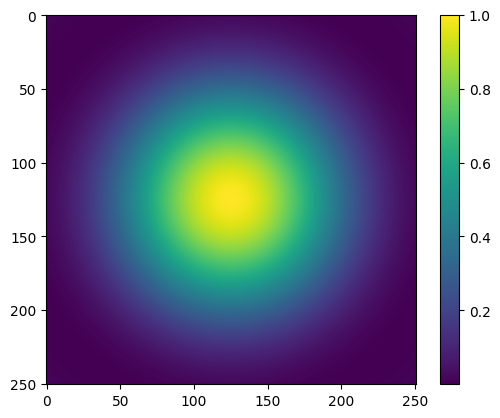

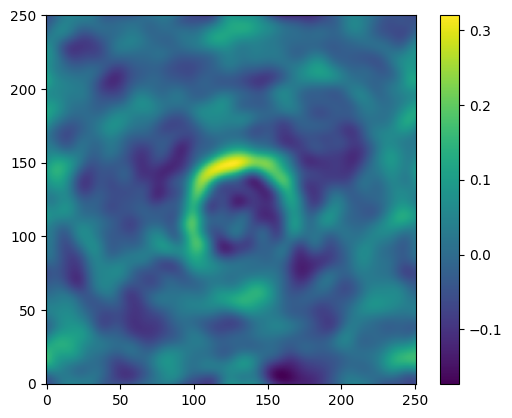

gridded_visibilities_2d:  (251, 251)
gridded_weights_2d:  (251, 251)
MAX FINAL: (0.003943260539577442+6.505213034913027e-19j)
MIN FINAL: (-1.870934850703884-0.04351756614479685j)


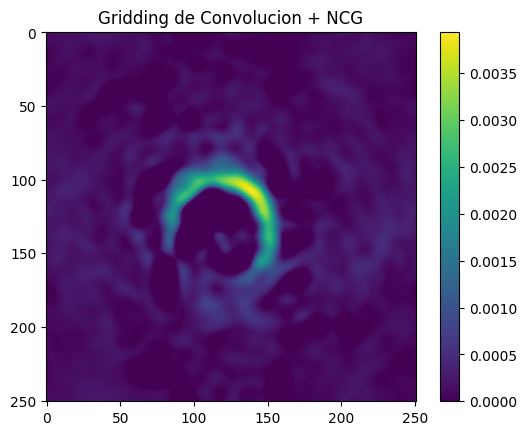

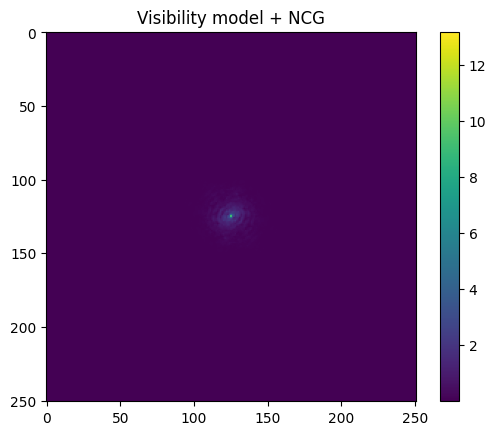

In [37]:
ejemplo_dg = preprocesamiento_datos_a_grillar.PreprocesamientoDatosAGrillar(
    "/disk2/stephan/TesisAlgoritmoParalelo/datasets/HD142/dirty_images_natural_251.fits",
    "/disk2/stephan/TesisAlgoritmoParalelo/datasets/HD142/hd142_b9cont_self_tav.ms",  
    251
)

visibilidades_grilladas, pesos_grillados, dx, u, v = ejemplo_dg.process_ms_file()

gridded_visibilities_2d = visibilidades_grilladas[0]  # (1,251,251)->(251,251)
gridded_weights_2d = pesos_grillados[0]  # (1,251,251)->(251,251)

print("gridded_visibilities_2d: ", visibilidades_grilladas[0].shape)
print("gridded_weights_2d: ", pesos_grillados[0].shape)


gc_image_1 = conjugate_gradient.ConjugateGradient(gridded_visibilities_2d, gridded_weights_2d/norm(gridded_weights_2d.flatten(), gridded_visibilities_2d.flatten()), 20)

gc_image_data = gc_image_1.CG()

visibility_model = np.fft.fftshift(np.fft.fft2(np.fft.ifftshift(gc_image_data)))

gc_image_model = np.fft.fftshift(np.fft.ifft2(np.fft.ifftshift(visibility_model)))


print("MAX FINAL:",np.max(gc_image_model))

print("MIN FINAL:",np.min(visibility_model))




title="Gridding de Convolucion + NCG"; fig=plt.figure(title); plt.title(title); im=plt.imshow(np.real(gc_image_model))
plt.colorbar(im)

title="Visibility model + NCG"; fig=plt.figure(title); plt.title(title); im=plt.imshow(np.absolute(visibility_model))
plt.colorbar(im)


plt.show()

1.0512941812754017e-06 rad
1.501848830393431e-07 rad


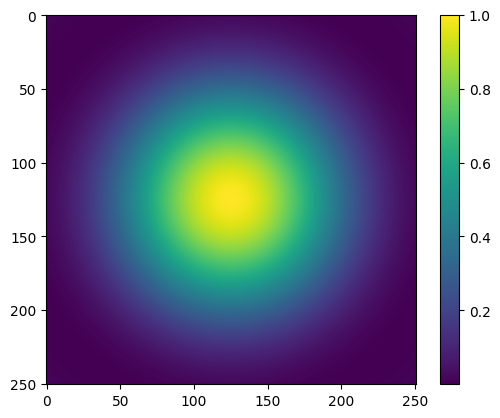

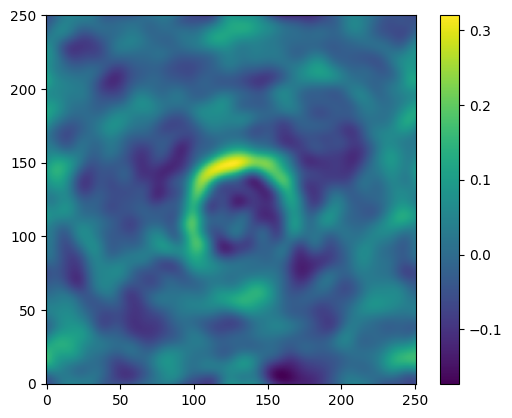

dx a entregar:  1.501848830393431e-07 rad
gw_sparse.shape:  (1043,)
u_sparse:  (1043,)
v_sparse:  (1043,)
z_sparse.shape:  (1043,)
26
Max. polynomial degree: 25
Division: 0.0750780409680797
Sigma: 3158171.6929829028


/disk2/stephan/anaconda3/envs/pyralysis-env/lib/python3.12/site-packages/matplotlib/cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/disk2/stephan/anaconda3/envs/pyralysis-env/lib/python3.12/site-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


Tiempo de ejecución: 9.01 segundos


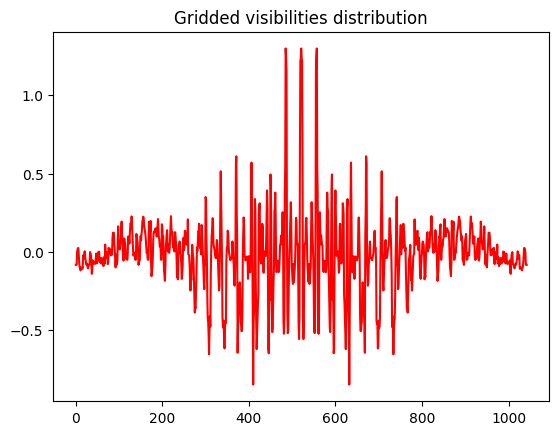

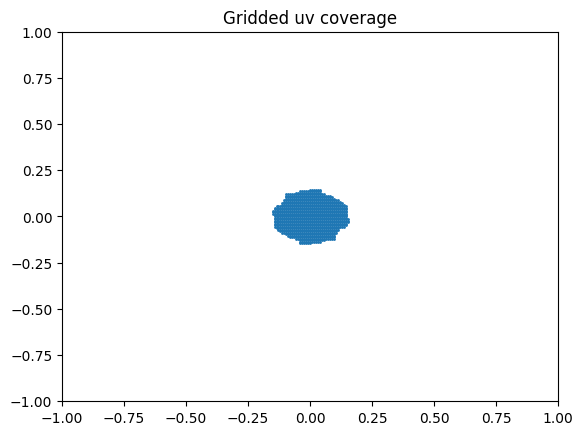

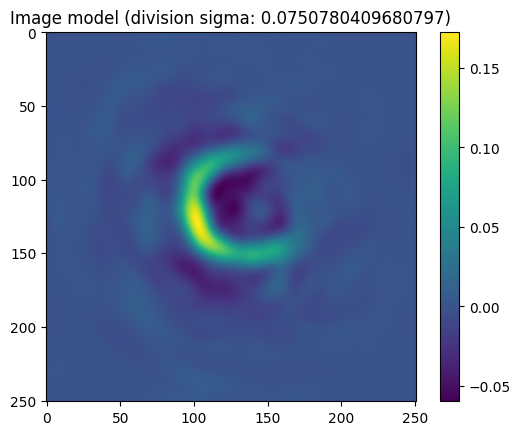

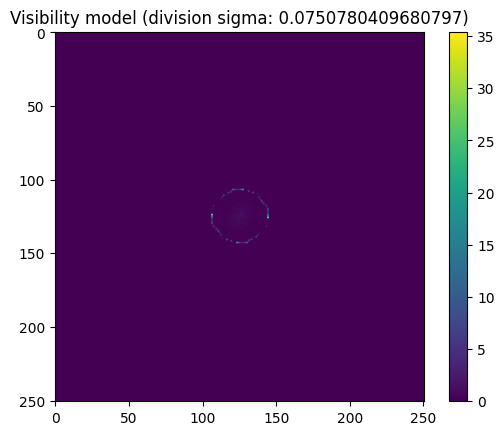

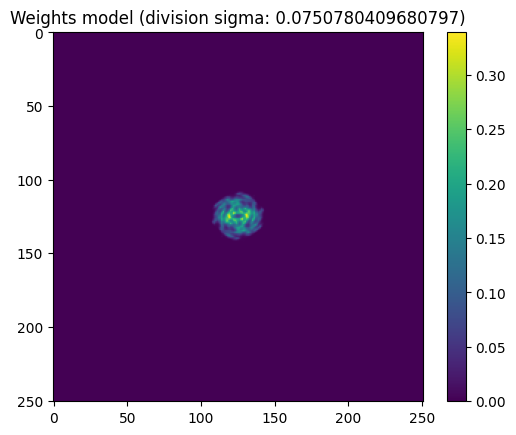

In [3]:
ejemplo_dg = procesamiento_datos_grillados.ProcesamientoDatosGrillados(
    "/disk2/stephan/TesisAlgoritmoParalelo/datasets/HD142/dirty_images_natural_251.fits",
    "/disk2/stephan/TesisAlgoritmoParalelo/datasets/HD142/hd142_b9cont_self_tav.ms", 
    25, 
    0.0750780409680797,
    1.501848830393431e-07,
    251,
    verbose = False
)

dirty_image, vis, weights, _, _ = ejemplo_dg.data_processing()

MAX FINAL: (0.001751197394659485+6.79259549323831e-10j)
MIN FINAL: (-0.6430614313983007+0.07768358589334981j)


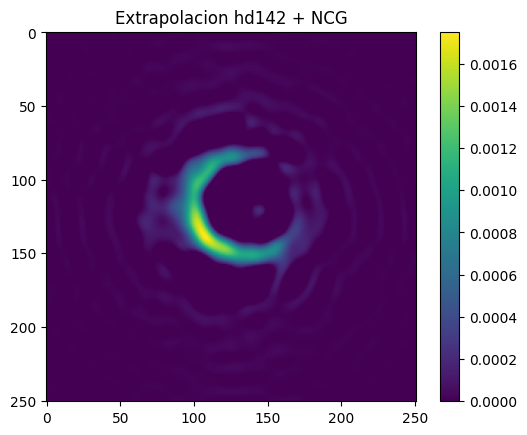

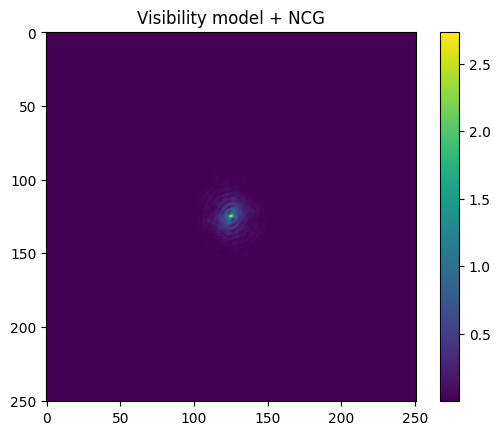

In [12]:
def norm(weights,x):
    return(np.absolute(np.sqrt(np.sum(weights*np.absolute(x)**2))))

gc_image_2 = conjugate_gradient.ConjugateGradient(vis, weights/norm(weights.flatten(), vis.flatten()), 10)

gc_image_data = gc_image_2.CG()

visibility_model = np.fft.fftshift(np.fft.fft2(np.fft.ifftshift(gc_image_data)))

gc_image_model = np.fft.fftshift(np.fft.ifft2(np.fft.ifftshift(visibility_model)))


print("MAX FINAL:",np.max(gc_image_model))

print("MIN FINAL:",np.min(visibility_model))


title="Extrapolacion hd142 + NCG"; fig=plt.figure(title); plt.title(title); im=plt.imshow(np.real(gc_image_model))
plt.colorbar(im)

title="Visibility model + NCG"; fig=plt.figure(title); plt.title(title); im=plt.imshow(np.absolute(visibility_model))
plt.colorbar(im)


plt.show()

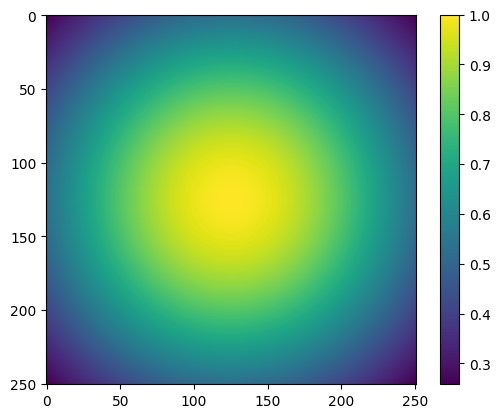

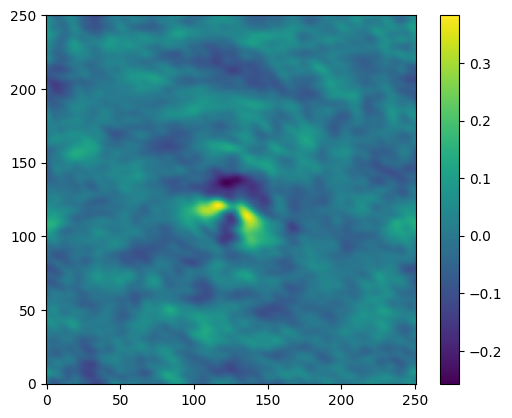

gw_sparse.shape:  (2712,)
u_sparse:  (2712,)
v_sparse:  (2712,)
z_sparse.shape:  (2712,)
21
Max. polynomial degree: 20
Division: 1e-07
Sigma: 3118790312500.0


/home/stephan/anaconda3/envs/pyralysis-env/lib/python3.12/site-packages/matplotlib/cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/home/stephan/anaconda3/envs/pyralysis-env/lib/python3.12/site-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


Tiempo de ejecución: 56.95 segundos


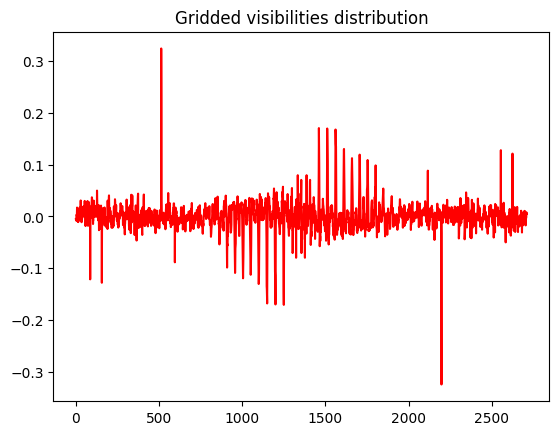

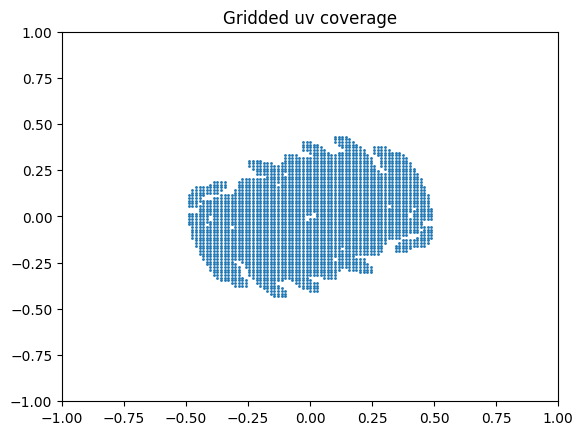

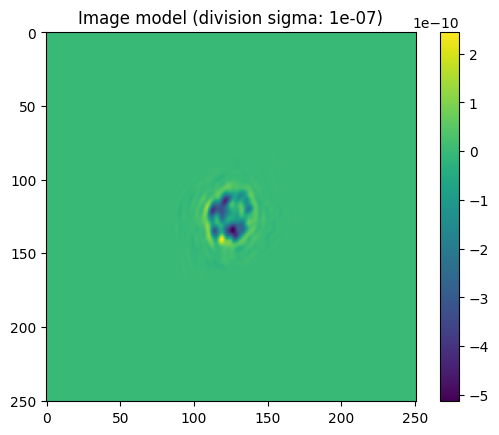

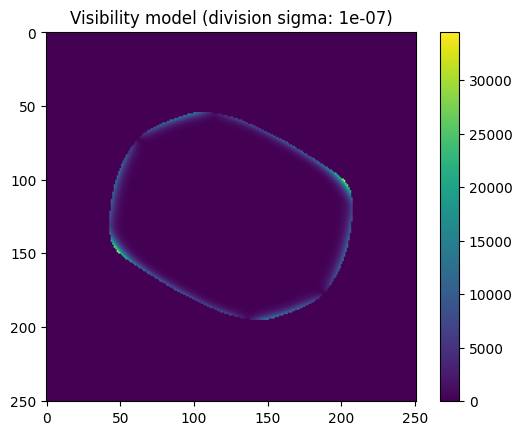

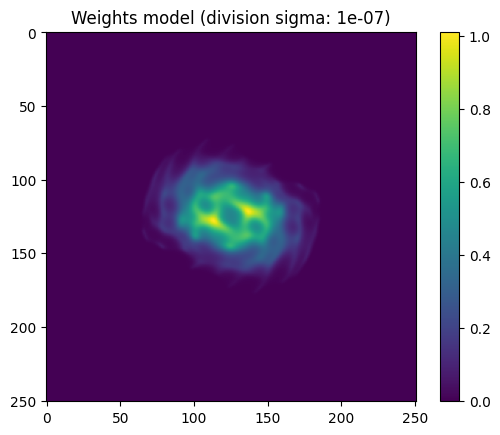

In [31]:
ejemplo_dg_2 = procesamiento_datos_grillados.ProcesamientoDatosGrillados(
    "/home/stephan/polynomial_preprocessing/datasets/FREQ78/FREQ78_p0.04_n513.fits",
    "/home/stephan/polynomial_preprocessing/datasets/FREQ78/FREQ78.ms", 
	20, 
    10**(-7),
    5.555555555556e-07,
    251,
    verbose=False
)
dirty_image, vis, weights, _, _ = ejemplo_dg_2.data_processing()

In [ ]:
ejemplo_dc_2 = procesamiento_datos_continuos.ProcesamientoDatosContinuos(
    "/home/stephan/polynomial_preprocessing/datasets/FREQ78/FREQ78_p0.04_n513.fits",
    "/home/stephan/polynomial_preprocessing/datasets/FREQ78/FREQ78.ms", 
	20, 
    10**(-1),
    -2.555555555556e-04,
    251,
    verbose=False
)
dirty_image, vis, weights, _, _ = ejemplo_dc_2.data_processing()

Image size of FITS:  513
visbilidades dim. MS:  (78779, 1, 2)
visibilidades gridd. MS:  (78779,)
u_target:  (513, 513)
v_target:  (513, 513)
Max. polynomial degree: 20
Division: 0.1
Sigma: 4271.172180175781
Polinomios inicializados.
Polinomios normalizados.


MAX FINAL: (1.5595751069968997e-11-9.321792847608054e-05j)
MIN FINAL: (-0.03193898915781847-0.0003283593872966341j)


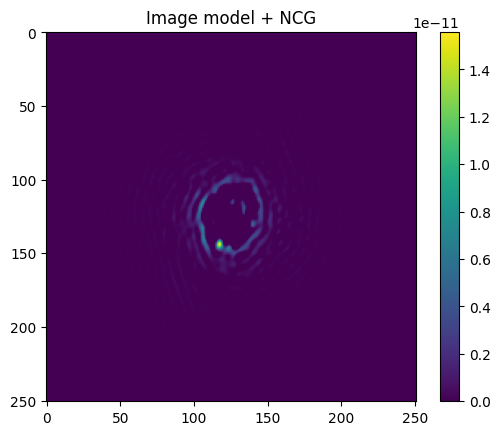

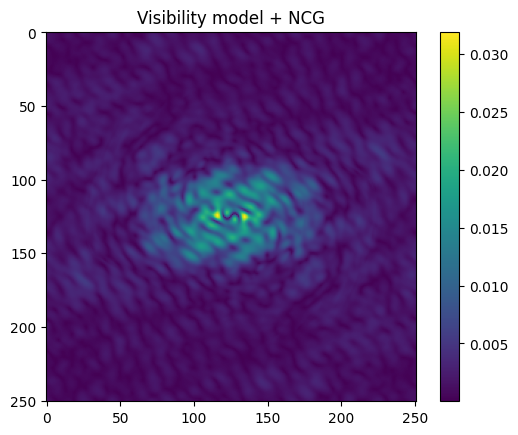

In [30]:
def norm(weights,x):
    return(np.absolute(np.sqrt(np.sum(weights*np.absolute(x)**2))))

gc_image_2 = conjugate_gradient.ConjugateGradient(vis, weights/norm(weights.flatten(), vis.flatten()), 3)

gc_image_data = gc_image_2.CG()

visibility_model = np.fft.fftshift(np.fft.fft2(np.fft.ifftshift(gc_image_data)))

gc_image_model = np.fft.fftshift(np.fft.ifft2(np.fft.ifftshift(visibility_model)))


print("MAX FINAL:",np.max(gc_image_model))

print("MIN FINAL:",np.min(visibility_model))


title="Image model + NCG"; fig=plt.figure(title); plt.title(title); im=plt.imshow(np.real(gc_image_model))
plt.colorbar(im)

title="Visibility model + NCG"; fig=plt.figure(title); plt.title(title); im=plt.imshow(np.absolute(visibility_model))
plt.colorbar(im)


plt.show()

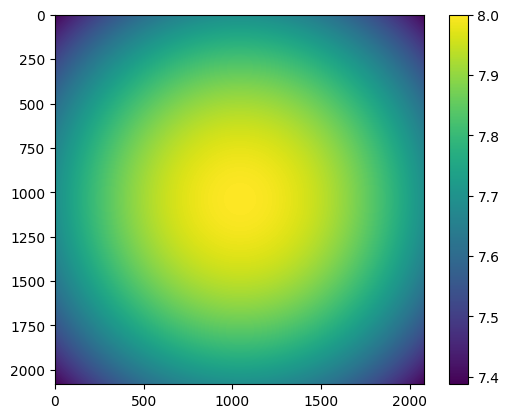

In [ ]:
visibilidades_grilladas_doar25, pesos_grillados_doar25 = ejemplo_dg_2.data_processing()

1.0640410139730754e-07 rad
1.5200585913901078e-08 rad


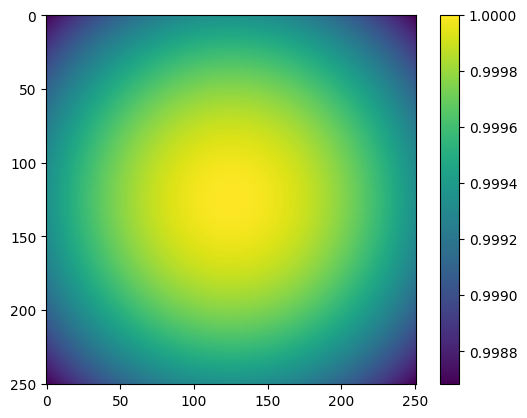

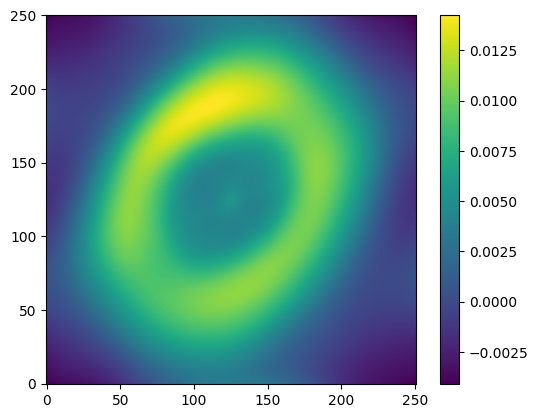

dx a entregar:  1.5200585913901078e-08 rad
gridded_visibilities_2d:  (251, 251)
gridded_weights_2d:  (251, 251)
MAX FINAL: (2.6700715447431935e-05+1.3234889800848443e-21j)
MIN FINAL: (-0.06022409406956331+0.006076861141810977j)


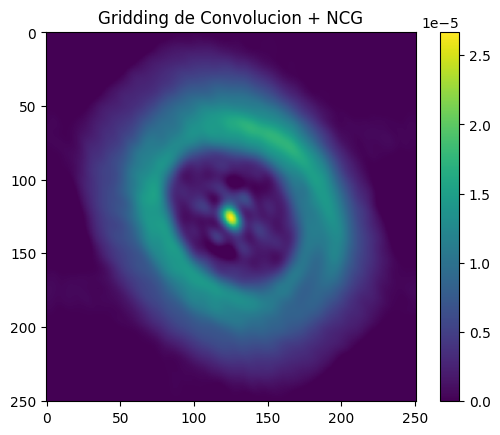

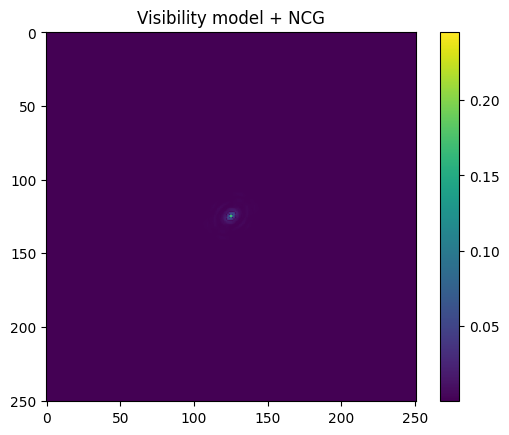

In [26]:
ejemplo_dg = preprocesamiento_datos_a_grillar.PreprocesamientoDatosAGrillar(
    "/disk2/stephan/TesisAlgoritmoParalelo/datasets/HD100546/hd100546_selfcal_cont_13_p513_cell_0005.fits",
    "/disk2/stephan/TesisAlgoritmoParalelo/datasets/HD100546/hd100546_selfcal_cont_13.ms", 
    251
)

visibilidades_grilladas, pesos_grillados, dx, u, v = ejemplo_dg.process_ms_file()

gridded_visibilities_2d = visibilidades_grilladas[0]  # (1,251,251)->(251,251)
gridded_weights_2d = pesos_grillados[0]  # (1,251,251)->(251,251)

print("gridded_visibilities_2d: ", visibilidades_grilladas[0].shape)
print("gridded_weights_2d: ", pesos_grillados[0].shape)


gc_image_1 = conjugate_gradient.ConjugateGradient(gridded_visibilities_2d, gridded_weights_2d/norm(gridded_weights_2d.flatten(), gridded_visibilities_2d.flatten()), 20)

gc_image_data = gc_image_1.CG()

visibility_model = np.fft.fftshift(np.fft.fft2(np.fft.ifftshift(gc_image_data)))

gc_image_model = np.fft.fftshift(np.fft.ifft2(np.fft.ifftshift(visibility_model)))


print("MAX FINAL:",np.max(gc_image_model))

print("MIN FINAL:",np.min(visibility_model))




title="Gridding de Convolucion + NCG"; fig=plt.figure(title); plt.title(title); im=plt.imshow(np.real(gc_image_model))
plt.colorbar(im)

title="Visibility model + NCG"; fig=plt.figure(title); plt.title(title); im=plt.imshow(np.absolute(visibility_model))
plt.colorbar(im)


plt.show()

1.0640410139730754e-07 rad
1.5200585913901078e-08 rad


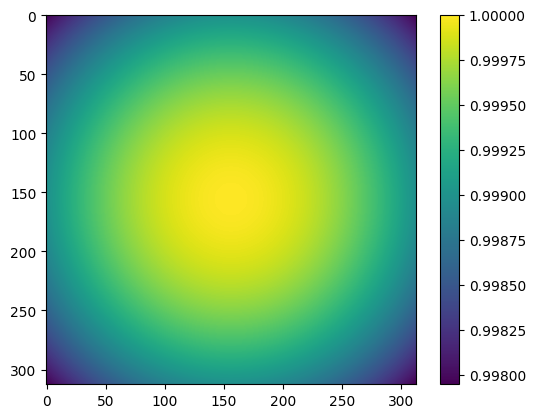

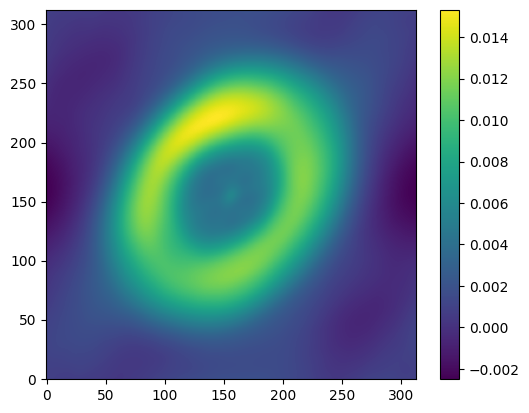

dx a entregar:  1.5200585913901078e-08 rad
gw_sparse.shape:  (3207,)
u_sparse:  (3207,)
v_sparse:  (3207,)
z_sparse.shape:  (3207,)
21
Max. polynomial degree: 20
Division: 0.0001
Sigma: 88594510000.0


/disk2/stephan/anaconda3/envs/pyralysis-env/lib/python3.12/site-packages/matplotlib/cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/disk2/stephan/anaconda3/envs/pyralysis-env/lib/python3.12/site-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


Tiempo de ejecución: 6.79 segundos


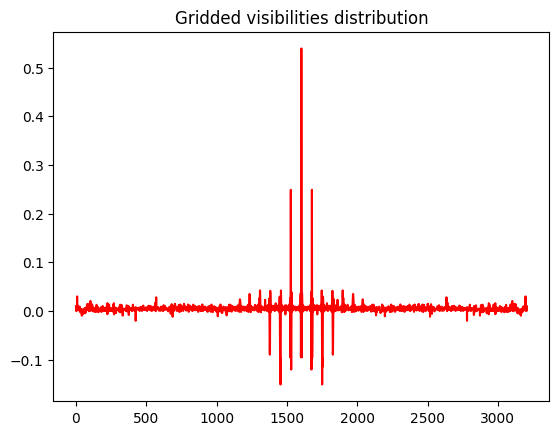

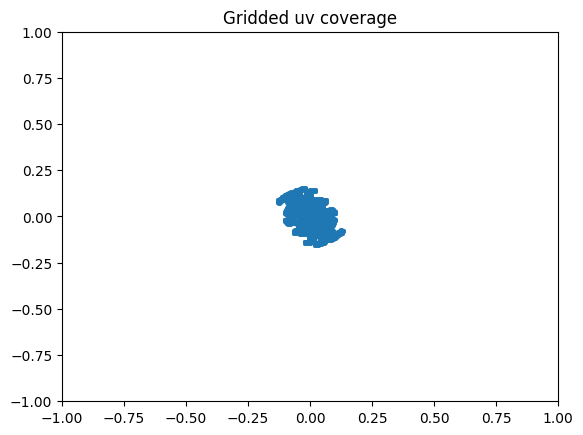

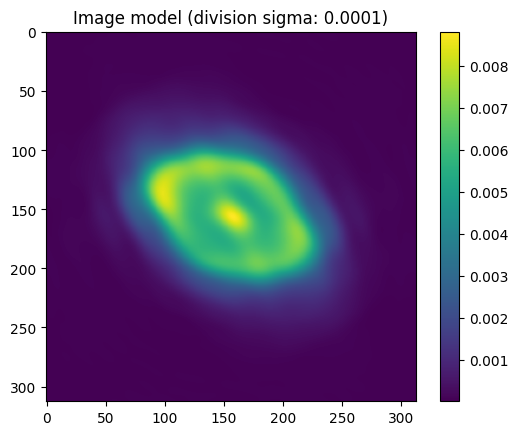

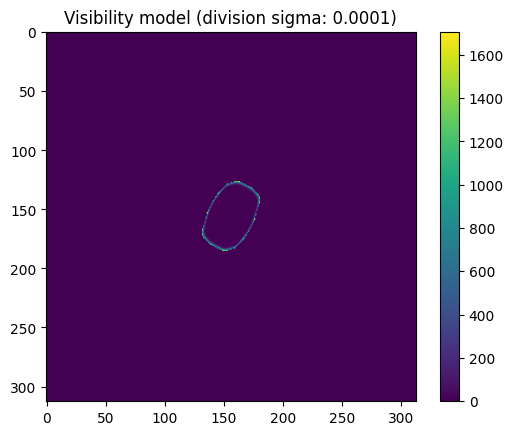

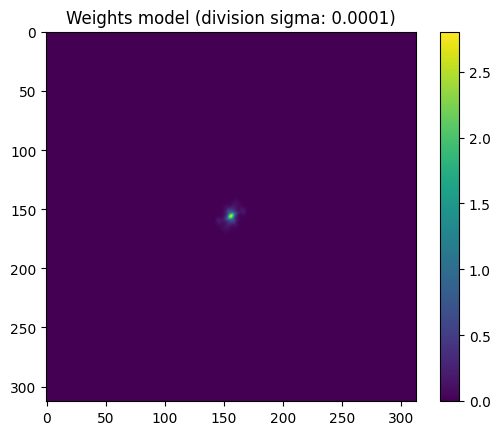

In [13]:
ejemplo1_dg_hd100546 = procesamiento_datos_grillados.ProcesamientoDatosGrillados(
	"/disk2/stephan/TesisAlgoritmoParalelo/datasets/HD100546/hd100546_selfcal_cont_13_p513_cell_0005.fits",
    "/disk2/stephan/TesisAlgoritmoParalelo/datasets/HD100546/hd100546_selfcal_cont_13.ms", 
	20, 
    0.0001,
    0.9200585913901078e-08,
    313,
    verbose=False
)

dirty_image, vis, weights, _, _ = ejemplo1_dg_hd100546.data_processing()

In [23]:
def norm(weights,x):
    return(np.absolute(np.sqrt(np.sum(weights*np.absolute(x)**2))))

In [24]:
gc_image_1 = conjugate_gradient.ConjugateGradient(vis, weights, 4)

gc_image_data = gc_image_1.CG()

MAX FINAL: (1.264906995111314e-05+1.4899986517404368e-13j)
MIN FINAL: (-0.017449893956706854+0.0006155482125768936j)


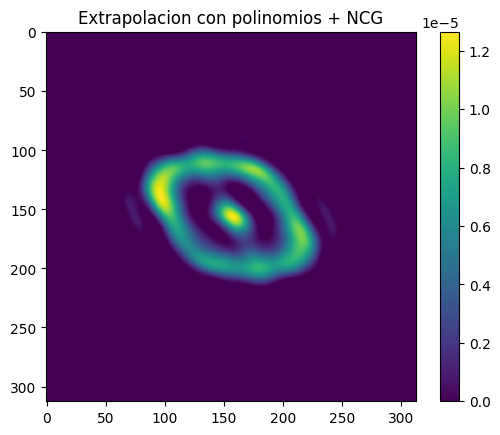

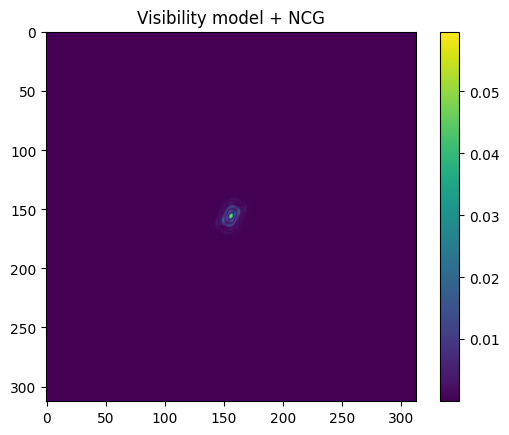

In [25]:
visibility_model = np.fft.fftshift(np.fft.fft2(np.fft.ifftshift(gc_image_data)))

gc_image_model = np.fft.fftshift(np.fft.ifft2(np.fft.ifftshift(visibility_model)))


print("MAX FINAL:",np.max(gc_image_model))

print("MIN FINAL:",np.min(visibility_model))



title="Extrapolacion con polinomios + NCG"; fig=plt.figure(title); plt.title(title); im=plt.imshow(np.real(gc_image_model))
plt.colorbar(im)

title="Visibility model + NCG"; fig=plt.figure(title); plt.title(title); im=plt.imshow(np.absolute(visibility_model))
plt.colorbar(im)


plt.show()

image.data.shape: (513, 513)
threshold:  1.3283460140228271


/tmp/ipykernel_23432/2412413751.py:39: DeprecationWarning: Supplying chunks as dimension-order tuples is deprecated. It will raise an error in the future. Instead use a dict with dimension names as keys.
  image.data = image.data.chunk(chunks)


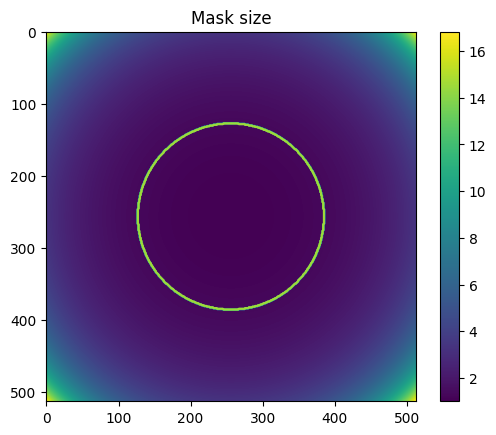

Starting Hager-Zhang method (Conj. Grad.)
Starting function value = 35712696.0000
Iteration 1
Alpha value = 1.161029e-05
Function value = 9221656.0000
Time: 107.2376 seconds
Iteration 2
Alpha value = 8.499631e-06
Function value = 6925635.5000
Time: 98.5322 seconds
Iteration 3
Alpha value = 7.770399e-06
Function value = 5535650.0000
Time: 235.1954 seconds
Iteration 4
Alpha value = 8.086629e-06
Function value = 4349857.5000
Time: 103.6737 seconds
Iteration 5
Alpha value = 6.409732e-06
Function value = 3500987.5000
Time: 119.7686 seconds
Iteration 6
Alpha value = 6.089230e-06
Function value = 2896692.0000
Time: 122.1648 seconds
Iteration 7
Alpha value = 5.530606e-06
Function value = 2569393.7500
Time: 126.2533 seconds
Iteration 8
Alpha value = 4.109485e-06
Function value = 2385467.5000
Time: 140.3347 seconds
Iteration 9
Alpha value = 3.138729e-06
Function value = 2254078.0000
Time: 101.8717 seconds
Iteration 10
Alpha value = 3.518666e-06
Function value = 2120375.0000
Time: 95.3035 seconds

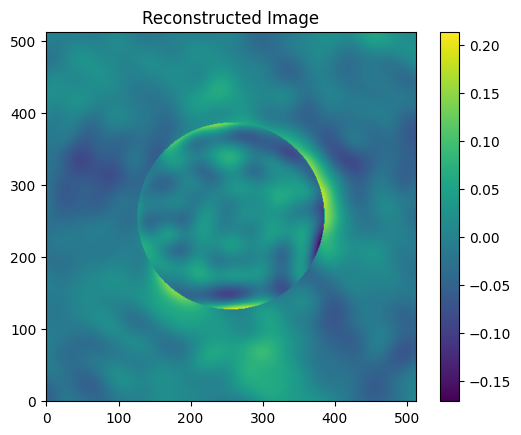

In [34]:
from pyralysis.estimators import NearestNeighbor
from pyralysis.optimization.fi import Chi2
from pyralysis.optimization import ObjectiveFunction
from pyralysis.optimization.linesearch import Brent
from pyralysis.optimization.optimizer import HagerZhang
from pyralysis.io import DaskMS, FITS
from pyralysis.reconstruction import Image
from pyralysis.reconstruction.mask import Mask
import matplotlib.pyplot as plt
import astropy.units as u
import psutil
import dask.array as da
import numpy as np

n_workers = psutil.cpu_count(logical=False) - 1

# Load dataset and a FITS image (replace with your files)
ms_file = "/disk2/stephan/TesisAlgoritmoParalelo/datasets/HD142/hd142_b9cont_self_tav.ms"
fits_file = "/disk2/stephan/TesisAlgoritmoParalelo/datasets/HD142/hd142_b9cont_self_tav_p513_cell_0.01.fits"

#Cargo archivo MS
x = DaskMS(input_name = ms_file)
dataset = x.read(filter_flag_column=False, calculate_psf=False)

# Cargo archivo FITS
fits_io = FITS(input_name = fits_file)
image = fits_io.read()

# Calculo tamano de pixel
cellsize_ms = dataset.theo_resolution / 7

image = Image(data=image.data, cellsize = cellsize_ms, name="I")


chunks = (image.data.shape[0] // n_workers, image.data.shape[1] // n_workers)

print("image.data.shape:", image.data.shape)

image.data = image.data.chunk(chunks)



freq = [dataset.spws.min_nu.value]
pb = dataset.antenna.primary_beam
pointings = dataset.field.phase_direction_cosines[0:2]
pointings_cartesian = (pointings / image.cellsize).value
beams = da.array(
    [
        pb.beam(
            frequency=freq,
            imsize=image.data.shape,
            cellsize=image.cellsize,
            antenna=np.array([0]),  # Token antenna, for default mask
            x_0=pointings[0][i].value,
            y_0=pointings[1][i].value,
            imcenter=(image.center_pixel[0], image.center_pixel[1])
        ) for i in range(pointings.shape[-1])
    ]
)
beam = da.sum(beams, axis=(0, 1, 2))
normalized_beam = beam / da.max(beam)

dims = ["x", "y"]
inverse_beam = (1 / normalized_beam).compute()  # The same as squeeze

th = np.percentile(inverse_beam, 20)
print("threshold: ", th)

x_pix = np.arange(0, image.data.shape[0])
y_pix = np.arange(0, image.data.shape[0])
Z = np.zeros((image.data.shape[0], image.data.shape[1]))
# Creating 2-D grid of features
X, Y = np.meshgrid(x_pix, y_pix)
Z[inverse_beam <= th] = 1

plt.imshow(inverse_beam)
plt.colorbar()
plt.contour(X, Y, Z)
plt.title("Mask size")

plt.show()


# Create a mask (e.g., based on a threshold from the primary beam)

mask = Mask(dataset=dataset, imsize=image.data.shape, threshold=th, cellsize=image.cellsize)

# Choose a ModelVisibilities estimator – for example, NearestNeighbor is used here.
mv = NearestNeighbor(
    input_data=dataset,
    image=image,
    hermitian_symmetry=False,
    padding_factor=1.0
)
mv.transform()

# Define the objective function using a Chi² term (additional Fi terms like L1Norm or Entropy can be added)
fi_list = [Chi2(model_visibility=mv, normalize=True)]
of = ObjectiveFunction(fi_list=fi_list, image=image, persist_gradient=True)

# Set up line search (Brent) and the optimizer (Hager–Zhang)
ls = Brent(objective_function=of)
niter = 10
optim = HagerZhang(
    image=image,
    objective_function=of,
    linesearch=ls,
    mask=mask,
    max_iter=niter,
    projection=None  # Optionally, a projection function can be provided.
)

# Run the optimization
result = optim.optimize(verbose=True, partial_image=False)
result_image = result.data.compute()



# Visualize the reconstructed image
plt.imshow(result_image, origin="lower")
plt.title("Reconstructed Image")
plt.colorbar()
plt.show()